<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/Roshan_project_aug_the_6th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hazm
# !pip install sentencepiece

In [2]:
import numpy as np
import pandas as pd
import torch as t
import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn
# import hazm


# Download Data

In [ ]:
f = open("/content/drive/MyDrive/Roshan Project/226741586876947.txt", "r")
file_ = f.read()

In [ ]:
file_.split('\n')[-1]

''

In [ ]:
import json
dicts = {}
bodys = []
ids = []
keywords = []

for i in file_.split('\n')[:-1]:
    dictData = json.loads(i)
    ids.append(dictData['id'])
    bodys.append(dictData['body'])
    keywords.append(dictData['keywords'])

In [ ]:
pp = []
for i in keywords:
    p = ''
    for j in i:
        p = p + ',' + j
    pp.append(p[1:])

In [ ]:
data = pd.DataFrame()
data['id'] = ids
data['body'] = bodys
data['keywords'] = pp

In [ ]:
data

In [ ]:
data['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

In [ ]:
data.to_csv('/content/drive/MyDrive/Roshan Project/data.csv',index=False)

# Check some error

In [ ]:
ks = []
kss = []

In [ ]:
for i in range(100):
    text = data['body'][i]
    label = data['keywords'][i]
    for k in label:
        if len(k)==1:
            if k in text.split():
                # print(j,'True')
                ks.append(1)
            else:
                # print(j,'False')
                ks.append(0)
        else:
            kss = []
            k2 = k.split()
            for k3 in k2:
                if k3 in text.split():
                    kss.append(1)
                    # print(k3,'True')
                    # ks.append(1)
                else:
                    kss.append(0)
                    # print(k3,'False')
                    # ks.append(0)
            if np.array(kss).sum() == len(k2):
                ks.append(1)
            else:
                ks.append(0)
# data['keywords'][0]
ks = np.array(ks)
ks.sum()/ks.shape[0]

0.7336683417085427

# Preprocessing on data

In [24]:
data = pd.read_csv('/content/drive/MyDrive/Roshan Project/data.csv')
data

,id,body,keywords
0,1,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,2,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,3,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن"
3,4,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,5,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
445,446,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد..."
446,447,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌..."
447,448,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری"
448,449,هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,"مدل GSTARS 2.1,نوع دوستی,رفتار شهروندی سازمانی..."


In [4]:
data['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

In [5]:
mrw = {}
for i in data['keywords']:
    for j in i.split(','):
        if mrw.get(j):
            mrw[j] = mrw[j] + 1
        else: mrw[j] = 1


In [6]:
smrw = sorted(mrw.items(), key=lambda x:x[1],reverse=True)

In [7]:
smrwl = []
for i in smrw:
    smrwl.append(i[1])
# smrwl

array([[<Axes: title={'center': 'Length'}>]], dtype=object)

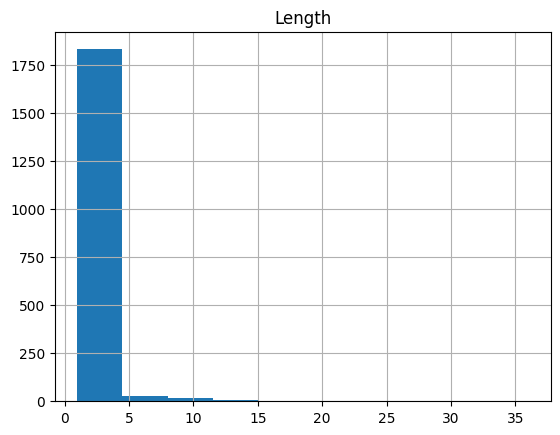

In [10]:
wc = pd.DataFrame()
wc['Length'] = smrwl
wc.hist()

# Cleaning

In [ ]:
l = 'چجحخهعغفقثصضگکمنتالبیسشوپدذرزطظژء آ ب پ ت ث ج چ ه خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و ه ی قدیمی‌ترین  '

In [33]:
l = 'چجحخهعغفقثصضگکمنتالبیسشوپدذرزطظژء آ ب پ ت ث ج چ ه خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و  , ه ی \u200c  '


In [26]:
# ' قدیمی‌ترین'

In [27]:
data

,id,body,keywords
0,1,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,2,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,3,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن"
3,4,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,5,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
445,446,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد..."
446,447,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌..."
447,448,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری"
448,449,هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,"مدل GSTARS 2.1,نوع دوستی,رفتار شهروندی سازمانی..."


In [28]:
k = data['body'][0]

In [34]:
def rnalph(k):
    kk = ''
    for i,j in enumerate(k):
        if (j in l)|(j == ' '):
            kk = kk + j
        else:pass
    return kk

In [30]:
rnalph(' قدیمی‌ترین')

' قدیمی\u200cترین'

In [31]:
import re

In [32]:
data['cleaned_comment'] = data['body'].apply(rnalph)


In [35]:
data['keywords'] = data['keywords'].apply(rnalph)


In [36]:
# data['keywords'] = data['body'].str.split(',').apply(rnalph)


In [37]:
data

,id,body,keywords,cleaned_comment
0,1,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...
1,2,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...
2,3,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرا تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...
3,4,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...
4,5,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...
...,...,...,...,...
445,446,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد...",پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...
446,447,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌...",سازمان ملل متحد در دهه های اخیر با تغییر ساختا...
447,448,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری",تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...
448,449,هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,"مدل ,نوع دوستی,رفتار شهروندی سازمانی,تواضع,کی...",هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...


In [43]:
# llm = 0
# nk = 0
# for i,j in zip(data['body'],data['keywords']):
#     k = len(j.split(','))
#     llm2 = 0
#     for j1 in j.split(','):
#         if j1 in i:
#             llm2 += 1
#     llm2 = llm2 / k
#     llm += llm2
# llm / data.shape[0]

In [46]:
# llm / data.shape[0]
0.7336683417085427
0.7997061703728389

0.7997061703728389

In [38]:
data['word_count'] = data['cleaned_comment'].str.split().str.len()
data["character_count"] = data['cleaned_comment'].str.len()

[]

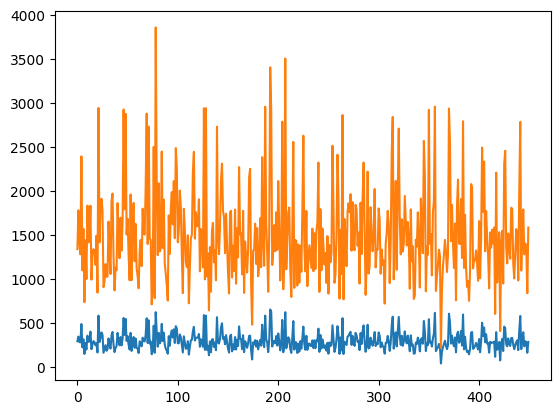

In [39]:
data['word_count'].plot()
data["character_count"].plot()
plt.plot()

In [ ]:
!gdown https://github.com/roshan-research/hazm/blob/master/hazm/data/stopwords.dat

Downloading...
From: https://github.com/roshan-research/hazm/blob/master/hazm/data/stopwords.dat
To: /content/stopwords.dat
11.9kB [00:00, 31.4MB/s]       


In [ ]:
f = open("/content/drive/MyDrive/Roshan Project/stopwords.txt", "r")
file_ = f.read()

In [ ]:
stop_words = file_.split('\n')

In [ ]:
stop_words

['و',
 'در',
 'به',
 'از',
 'که',
 'این',
 'را',
 'با',
 'است',
 'برای',
 'آن',
 'یک',
 'خود',
 'تا',
 'کرد',
 'بر',
 'هم',
 'نیز',
 'گفت',
 'می\u200cشود',
 'وی',
 'شد',
 'دارد',
 'ما',
 'اما',
 'یا',
 'شده',
 'باید',
 'هر',
 'آنها',
 'بود',
 'او',
 'دیگر',
 'دو',
 'مورد',
 'می\u200cکند',
 'شود',
 'کند',
 'وجود',
 'بین',
 'پیش',
 'شده_است',
 'پس',
 'نظر',
 'اگر',
 'همه',
 'یکی',
 'حال',
 'هستند',
 'من',
 'کنند',
 'نیست',
 'باشد',
 'چه',
 'بی',
 'می',
 'بخش',
 'می\u200cکنند',
 'همین',
 'افزود',
 'هایی',
 'دارند',
 'راه',
 'همچنین',
 'روی',
 'داد',
 'بیشتر',
 'بسیار',
 'سه',
 'داشت',
 'چند',
 'سوی',
 'تنها',
 'هیچ',
 'میان',
 'اینکه',
 'شدن',
 'بعد',
 'جدید',
 'ولی',
 'حتی',
 'کردن',
 'برخی',
 'کردند',
 'می\u200cدهد',
 'اول',
 'نه',
 'کرده_است',
 'نسبت',
 'بیش',
 'شما',
 'چنین',
 'طور',
 'افراد',
 'تمام',
 'درباره',
 'بار',
 'بسیاری',
 'می\u200cتواند',
 'کرده',
 'چون',
 'ندارد',
 'دوم',
 'بزرگ',
 'طی',
 'حدود',
 'همان',
 'بدون',
 'البته',
 'آنان',
 'می\u200cگوید',
 'دیگری',
 'خواهد_شد',


In [ ]:
def rmst(x):
    s = x.split()
    ss = ''
    for i in s:
        if i not in stop_words:
            ss = ss + ' ' + i
        else: pass

    return ss[1:]

In [ ]:
rmst('سلام خوبی')

'سلام'

In [ ]:
data.columns

Index(['id', 'body', 'keywords', 'cleaned_comment', 'word_count',
       'character_count'],
      dtype='object')

In [ ]:
data['stpowords_punc_cleaned'] = data['cleaned_comment'].apply(rmst)

In [ ]:
data

,id,body,keywords,cleaned_comment,word_count,character_count,stpowords_punc_cleaned
0,1,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ...",این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,290,1337,نوشتار بررسی فقه الحدیثی کتاب معانی الاخبار شی...
1,2,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت...",چکیده این پژوهش براساس چارچوب نظری د...,343,1778,چکیده پژوهش چارچوب نظری دولت توسعه گرای آدریان...
2,3,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن",فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,282,1414,فهم معانی عمیق تدبر آیات قرآن کریم بهره‌مندی م...
3,4,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک...",آزادی موهبتی است الهی که خدای متعال به انسان ع...,277,1278,آزادی موهبتی الهی خدای متعال انسان عطا فرمود ا...
4,5,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی...",یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,485,2392,نکاتی توجه پژوهشگران اندیشه‌های سیاسی اجتماعی ...
...,...,...,...,...,...,...,...
445,446,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد...",پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,232,1278,پژوهش حاضر هدف بررسی رابطه رضایت شغلی تعهد ساز...
446,447,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌...",سازمان ملل متحد در دهه های اخیر با تغییر ساختا...,290,1401,سازمان ملل متحد های ساختار عملکرد تثیرات گسترد...
447,448,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری",تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,278,1371,تفسیرهای فقهی قدیمی‌ترین تفاسیری قرن کنون تدوی...
448,449,هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,"مدل GSTARS 2.1,نوع دوستی,رفتار شهروندی سازمانی...",هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,159,836,هدف انجام تحقیق بررسی تاثیر کیفیت زندگی کاری ر...


# No! something before Tf-IDs

In [ ]:
from collections import Counter

In [ ]:
# c = Counter()
# Counter(data['no_stop'][0].split())

# TF-IDs

In [ ]:
data.no_stop

AttributeError: ignored

In [ ]:
!pip install hazm
from hazm import *

normalizer = Normalizer()
normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')


In [ ]:
normalizer = Normalizer()
normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')


'اصلاح نویسه\u200cها و استفاده از نیم\u200cفاصله پردازش را آسان می\u200cکند'

In [ ]:
def norm(x):
    return normalizer.normalize(x)

In [ ]:
data['midspace'] = data['stpowords_punc_cleaned'].apply(norm)

In [ ]:
def norm2(x):
    x = re.sub('\u200c','',x)
    return x

In [ ]:
norm2('\u200cawdawdad')

'awdawdad'

In [ ]:
data['midspace2'] = data['midspace'].apply(norm2)
data['keywords'] = data['keywords'].apply(norm)
data['keywords'] = data['keywords'].apply(norm2)
# data['keywords'] = data['keywords'].apply(rnalph)
data['keywords'] = data['keywords'].apply(rmst)




In [ ]:
print(data['keywords'][0])

فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش هندسی روایات,شیخ صدوق,مبانی فقه الحدیثی


In [ ]:
data.columns = ['id', 'original', 'keywords', 'punc_cleaned', 'word_count','character_count', 'stpowords_punc_cleaned','midspace','midspace2']

In [ ]:
cls = ['original','punc_cleaned','stpowords_punc_cleaned','midspace','midspace2']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
p2= {}
for ii2 in cls:
    p = []
    for ii in range(1,9):
        tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', ngram_range=(1, ii))
        tfidffitted = tfidf.fit(data[f'{ii2}'])
        cols = np.array(sorted({(i,j) for j,i in tfidf.vocabulary_.items()}))[:,1]
        X = tfidffitted.transform(data[f'{ii2}']).toarray()
        dataset_dummys = pd.DataFrame(X,columns=cols)
        p.append(dataset_dummys.shape[1])
        # print(ii,dataset_dummys.shape[1])
    p2[ii2] = p
# p

In [ ]:
# data['midspace'][0:1].values[0].split()

<Axes: >

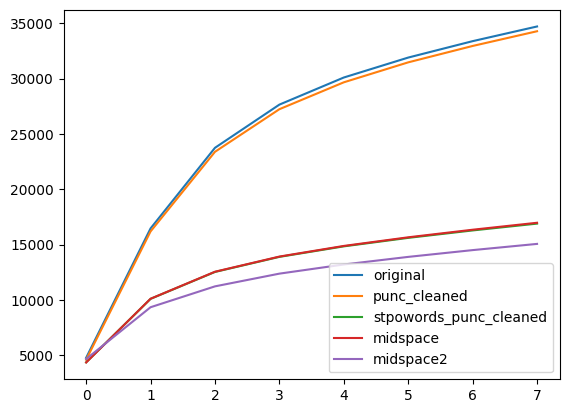

In [ ]:
pp = pd.DataFrame().from_dict(p2,orient='index')
# pp.columns = cls
pp.T.plot()
# pp

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', ngram_range=(1, 5))
tfidffitted = tfidf.fit(data['midspace'])
cols = np.array(sorted({(i,j) for j,i in tfidf.vocabulary_.items()}))[:,1]
X = tfidffitted.transform(data['midspace']).toarray()
dataset_dummys = pd.DataFrame(X,columns=cols)

In [ ]:
dataset_dummys

,آباد,آباد غرب,آباد غرب رابطه,آباد غرب رابطه معنی,آباد غرب رابطه معنی داری,آباد غرب سال,آبادی,آثار,آثار ادبی,آثار استخراج,...,یک,یک سو,یکسان,یکسو,یکم,یکپارچه,یکپارچگی,یگانه,یگانگی,یی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072186,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# for i in list(dataset_dummys.columns):
#     print('Yes' if '\u200c' in i else '')

In [ ]:
i7 = {}
for i4 in [20,-1]:
    i6 = []
    for i3 in range(dataset_dummys.shape[0]):
        p = dict(dataset_dummys.T[i3].sort_values(ascending=False)[0:i4])
        p = list(p)
        i2 = ''
        for i in p:
            i2 = i2 + ',' + i
            i2 = i2[1:]
        i6.append(i2)
    i7[i4] = i6

In [ ]:
i8 = pd.DataFrame().from_dict(i7,orient='index').T
# i8.columns = ['20 words', '30 words', '40 words','50 words','60 words','70 words','80 words','90 words','100 words']
i8.columns = ['20 words', '-1']

i8.T

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
20 words,",صدوق,شیخ صدوق,شیخ,فقه,چینش,حیطه,روایات,ره,بیا...","شتم,توسعهای,نهم دهم,مبانی فکری,نهم,هفتم,توسعه ...","دی,تفسیری,محمد,قرآن,تدبر,قرآن کریم,کریم,نوشتار...","ال,دین,پیامبر,اسلام,جدال,عالیه,موعظه,احسن,اهان...","عقاید,آزادی,تفسیر دین,میپذیرد,اندیشههای سیاسی,...","ت تفسیری,تفسیری,روایات,آیتالله,معرفت,آسیب,تفسی...",",دانش آموزان,تحصیلی,گروه,متوسطه شهرستان اسلامآ...","ایت زناشویی,معنویت درمانی,کیفیت زندگی,زناشویی,...","دگیری,خدمت,اثربخشی,دورههای,فرهنگ تسهیم,فرهنگ ت...","ت علمی دانشگاه آزاد اسلامی واحد مرودشت,ثبت دان...",...,"ارسی,ادبیات عرفانی,عرفانی,کرامت,اسطورهای,قصهها...","عزت,روانی,نفس انسان,روح الهی,بداند,عزت نفس,ساز...","اجتماعی مشارکت,دینی دانشجویان,سرمایه اجتماعی,د...","ه وحدت,ملاصدرا,بهشت,عقل,مرتبه,عقل وحی,محض,فلسف...","قی,فلاسفه,ملاصدرا,فلاسفه اسلامی,شکل اساس,عبودی...","میته امداد,امداد,رضایت شغلی,شغلی,رضایت شغلی تع...","میمات,شورای,بشر,شورا,حقوق,ضمانت اجرای,تسیس شور...","واعد تفسیری,العرفان,فاضل مقداد,فاضل,مقداد,گرفت...","ندگی کاری,کمیته امداد امام خمینی ره استان,امدا...","دگی کاری,عملکرد شغلی,کیفیت زندگی,کاری,آزاد اسل..."
-1,"مطلب توجه ذیل,مشخصات همزمان مطلب توجه ذیل بحث...","شکلات کاهش,مشکلات کاهش رفع,مشکلات کاهش رفع موا...","یت,مشکلات کاهش رفع موانع توجه,مشروط,مشکلات کاه...","توجه,مشکلات کاهش رفع موانع توجه نکات,مشکلات کا...","کمیت,مشروطه,مشکلات کاهش رفع موانع توجه نکات,مش...","ت,مشکل,مشکل اساسی,مشکلات,مشکلات اجرایی,مشکلات ...","ل بحث گونهشناسی,مشترک ملاصدرا توماس خدایی,مشتر...","موانع توجه نکات حاکمیت اخلاق,مشکلاتی,مشکلی,مش...","م برهان جهان شناختی,مسلهی اصلی,مسول,مسولان,مسو...","العه,قرآن طرفی,قرآن تربیت,قرآن تربیت نکات,قرآن...",...,"ادیق,مصادیق مبانی,مصادیق مسولیت,مصادیقی,مصالح,...","ات همزمان مطلب,مشهور,مشخصات همزمان مطلب توجه,م...","شخصات,مشخصات همزمان,مشخصات همزمان مطلب,مشخصات ...","مشخصی,مشروح,مشروط,مشروطه,مشروطیت,مشروع,مشروعیت...","اساسی,مشکلات,مشکلات اجرایی,مشکلات اختلالات,مشک...","تماعی متحول,قرار حقوق خانواده مسیر تحولات اجتم...","ی,مشروعیت مصادیق,مشروعیت نظام,مشرکان,مشغول,مشغ...","ش,مشهود,مشهور,مشورت,مشکل,مشکل اساسی,مشکلات,مشک...","ساس کار قرار سازمانها پیوسته عملکرد,مسولیت مدن...","ات تفسیری ذیل,قرار توان روایات تفسیری ذیل سوره..."


In [ ]:
i8['keywords'] = data['keywords']
i8

,20 words,-1,keywords
0,",صدوق,شیخ صدوق,شیخ,فقه,چینش,حیطه,روایات,ره,بیا...","مطلب توجه ذیل,مشخصات همزمان مطلب توجه ذیل بحث...","فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,"شتم,توسعهای,نهم دهم,مبانی فکری,نهم,هفتم,توسعه ...","شکلات کاهش,مشکلات کاهش رفع,مشکلات کاهش رفع موا...","سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,"دی,تفسیری,محمد,قرآن,تدبر,قرآن کریم,کریم,نوشتار...","یت,مشکلات کاهش رفع موانع توجه,مشروط,مشکلات کاه...","جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن"
3,"ال,دین,پیامبر,اسلام,جدال,عالیه,موعظه,احسن,اهان...","توجه,مشکلات کاهش رفع موانع توجه نکات,مشکلات کا...","محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,"عقاید,آزادی,تفسیر دین,میپذیرد,اندیشههای سیاسی,...","کمیت,مشروطه,مشکلات کاهش رفع موانع توجه نکات,مش...","آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
445,"میته امداد,امداد,رضایت شغلی,شغلی,رضایت شغلی تع...","تماعی متحول,قرار حقوق خانواده مسیر تحولات اجتم...","شیراز,ارزیابی عملکرد,کارکنان,عملکرد شغل,تعهد س..."
446,"میمات,شورای,بشر,شورا,حقوق,ضمانت اجرای,تسیس شور...","ی,مشروعیت مصادیق,مشروعیت نظام,مشرکان,مشغول,مشغ...","کمیسیون حقوقبشر,حقوقبشر ایران,بررسی دورهای جها..."
447,"واعد تفسیری,العرفان,فاضل مقداد,فاضل,مقداد,گرفت...","ش,مشهود,مشهور,مشورت,مشکل,مشکل اساسی,مشکلات,مشک...","استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری"
448,"ندگی کاری,کمیته امداد امام خمینی ره استان,امدا...","ساس کار قرار سازمانها پیوسته عملکرد,مسولیت مدن...","مدل GSTARS ۲ ٫ ۱ ,نوع دوستی,رفتار شهروندی سازم..."


In [ ]:
# i8['100 words'][0:1].values[0].split(',')

In [ ]:
data['word_count'].mean()

293.24888888888887

In [ ]:
# i8.to_csv('/content/drive/MyDrive/Roshan Project/i8.csv',index=False)
df_com = i8.copy()

In [ ]:
df_com.columns

In [ ]:
i2 = {}
for i3 in ['20 words', '-1']:
# for i3 in ['20 words', '30 words', '40 words','50 words','60 words','70 words','80 words','90 words','100 words']:
    l1 = []
    for i,j in enumerate(df_com['keywords']):
        l2 = []
        for j2 in j.split(','):
            if j2 in list(df_com[i3])[i]:
                l2.append(1)
            else:
                l2.append(0)
        p = np.array(l2).sum()/np.array(l2).shape[0]
        l1.append(p)
    i2[i3] = l1
i2

In [ ]:
pd.DataFrame().from_dict(i2,orient='index').T.plot()

In [ ]:
df_com['keywords'][-1:]

In [ ]:
for i in df_com.columns:
    for j in df_com['keywords'][-1:].values[0].split(','):
        print(j,j in df_com[i][-1:].values[0])

In [ ]:
df_com.columns

Index(['20 words', '30 words', '40 words', '50 words', '60 words', '70 words',
       '80 words', '90 words', '100 words', 'keywords'],
      dtype='object')

In [ ]:
df_com['10 words'][0:1].values[0]

KeyError: ignored

# Clustering

In [ ]:
!pip install arabic-reshaper

In [ ]:
!pip install python-bidi

In [ ]:
import arabic_reshaper

In [ ]:
from bidi.algorithm import get_display

In [ ]:
def _(text):
    return get_display(
        arabic_reshaper.reshape(
            u'%s' % str(text)
        )
    )

In [ ]:
uwl = list(data['no_stop'])

Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.100s.
Extracting tf features for LDA...
done in 0.109s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.183s.


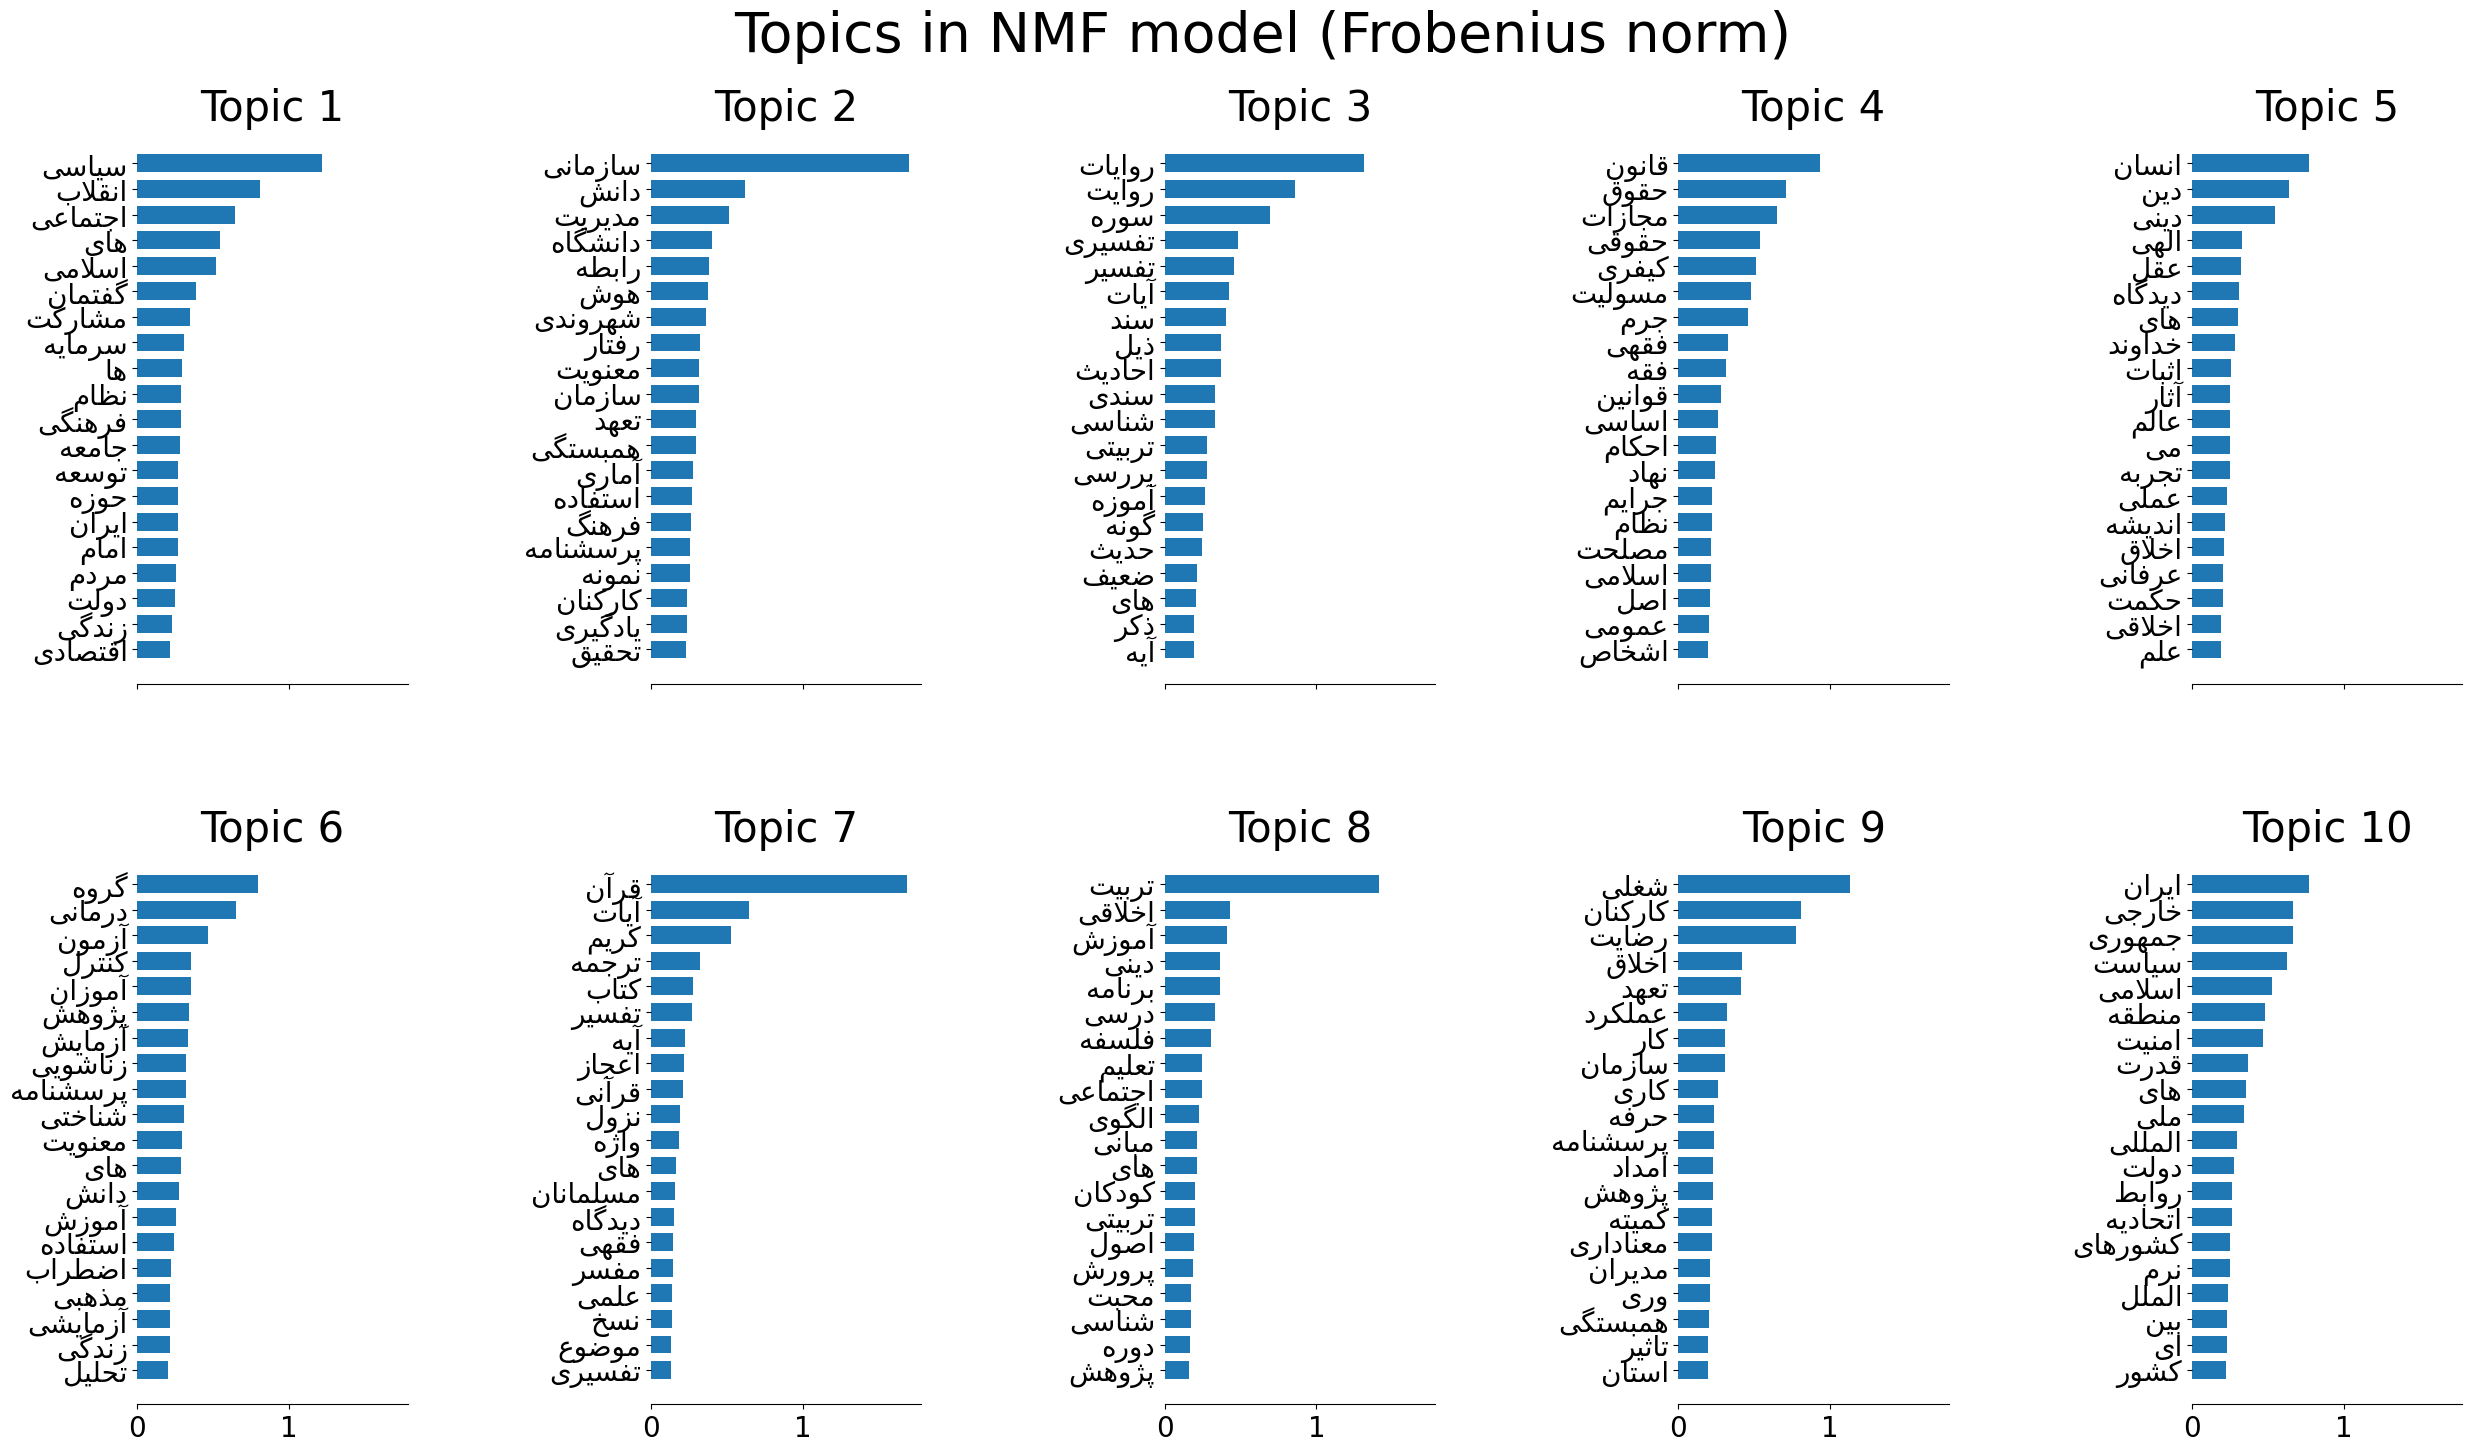



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.557s.


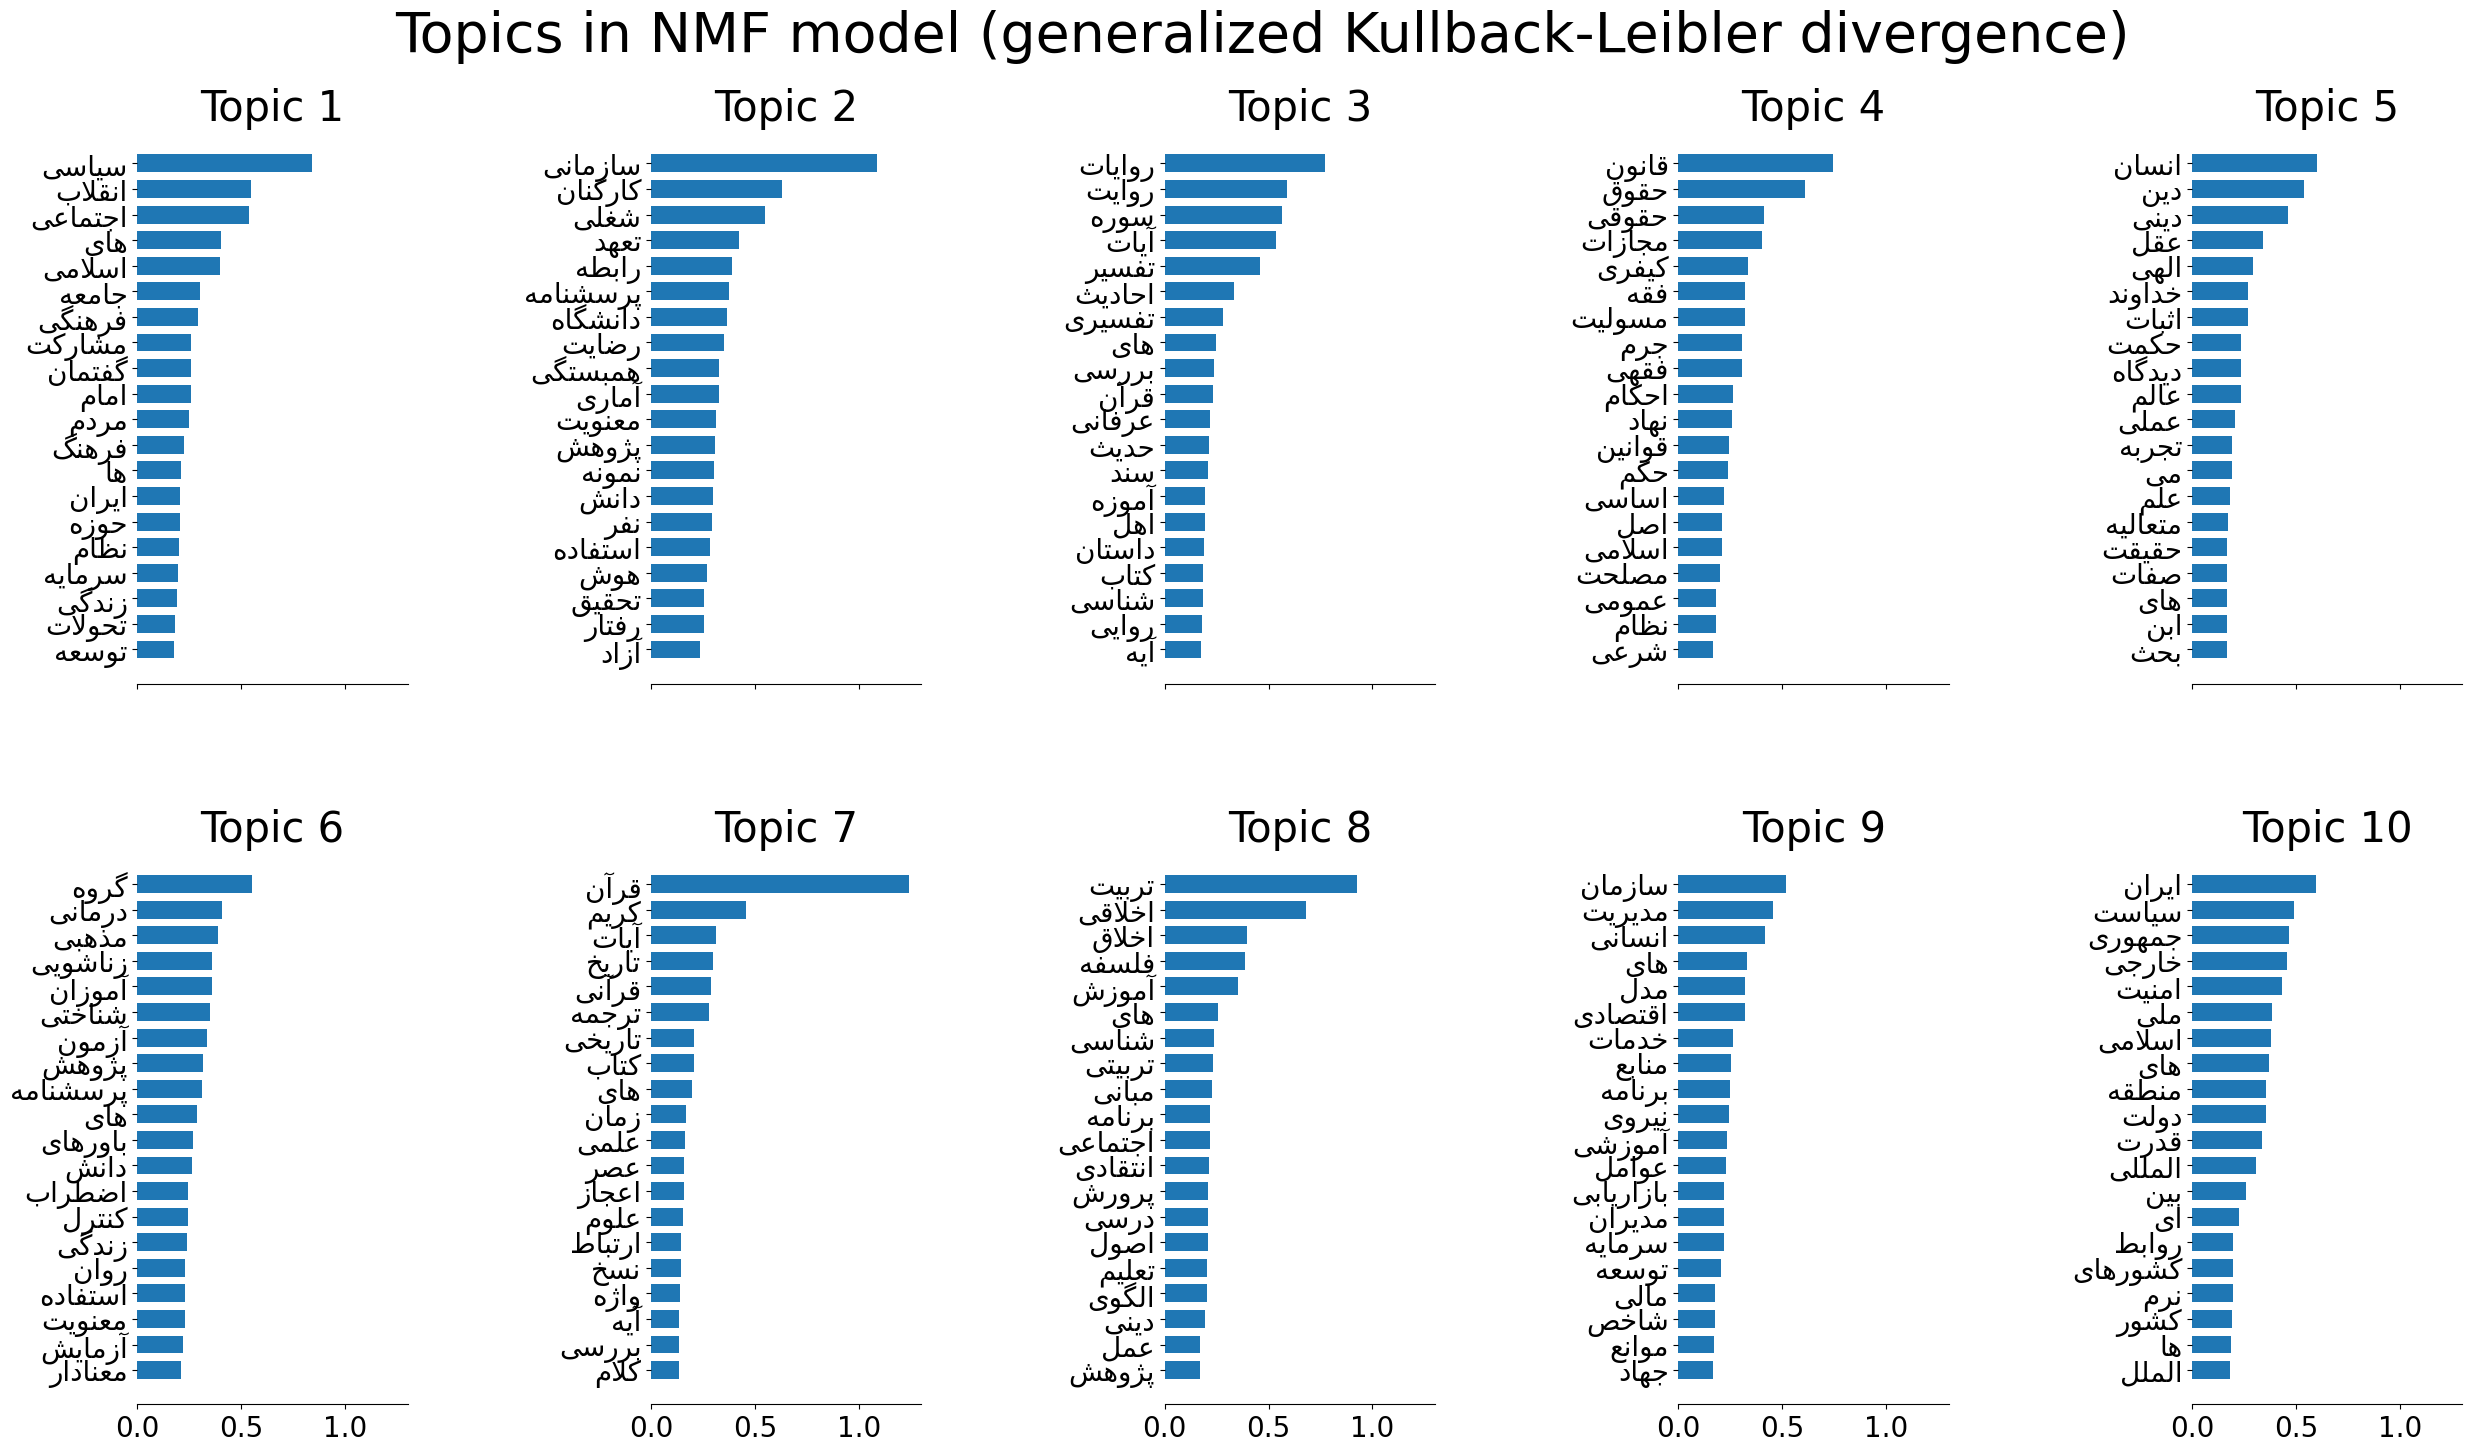



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:2239: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 1.800s.


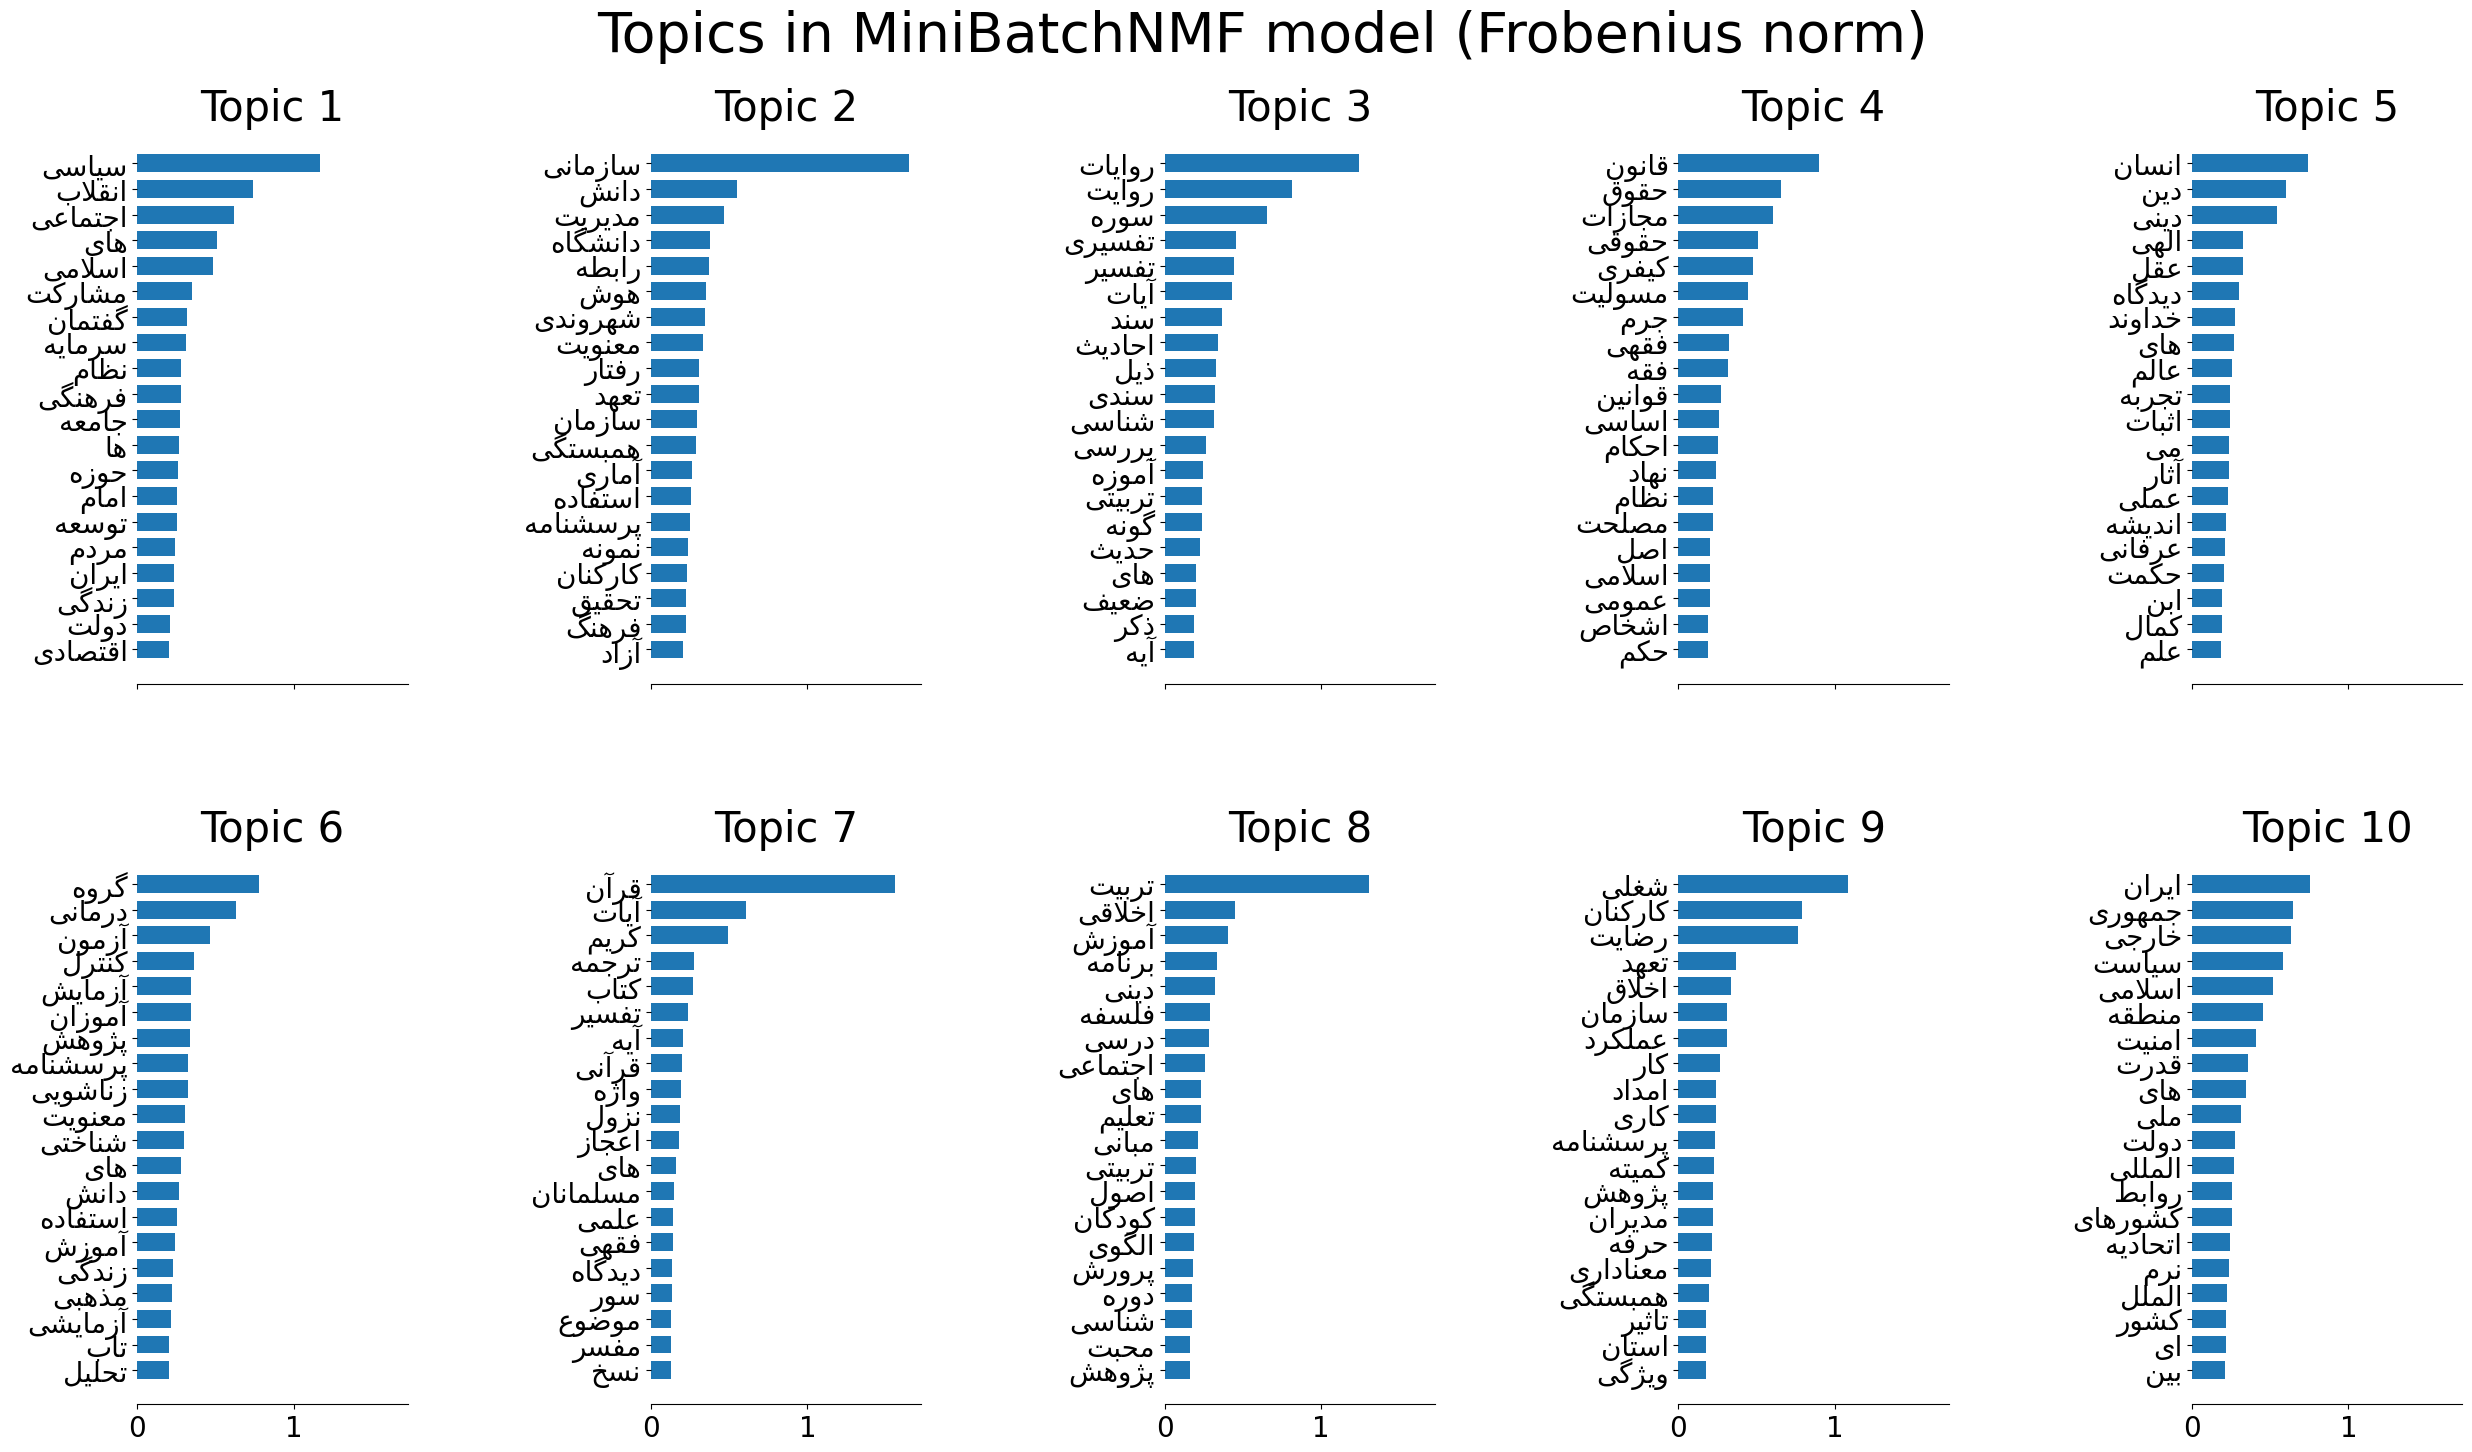



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 4.494s.


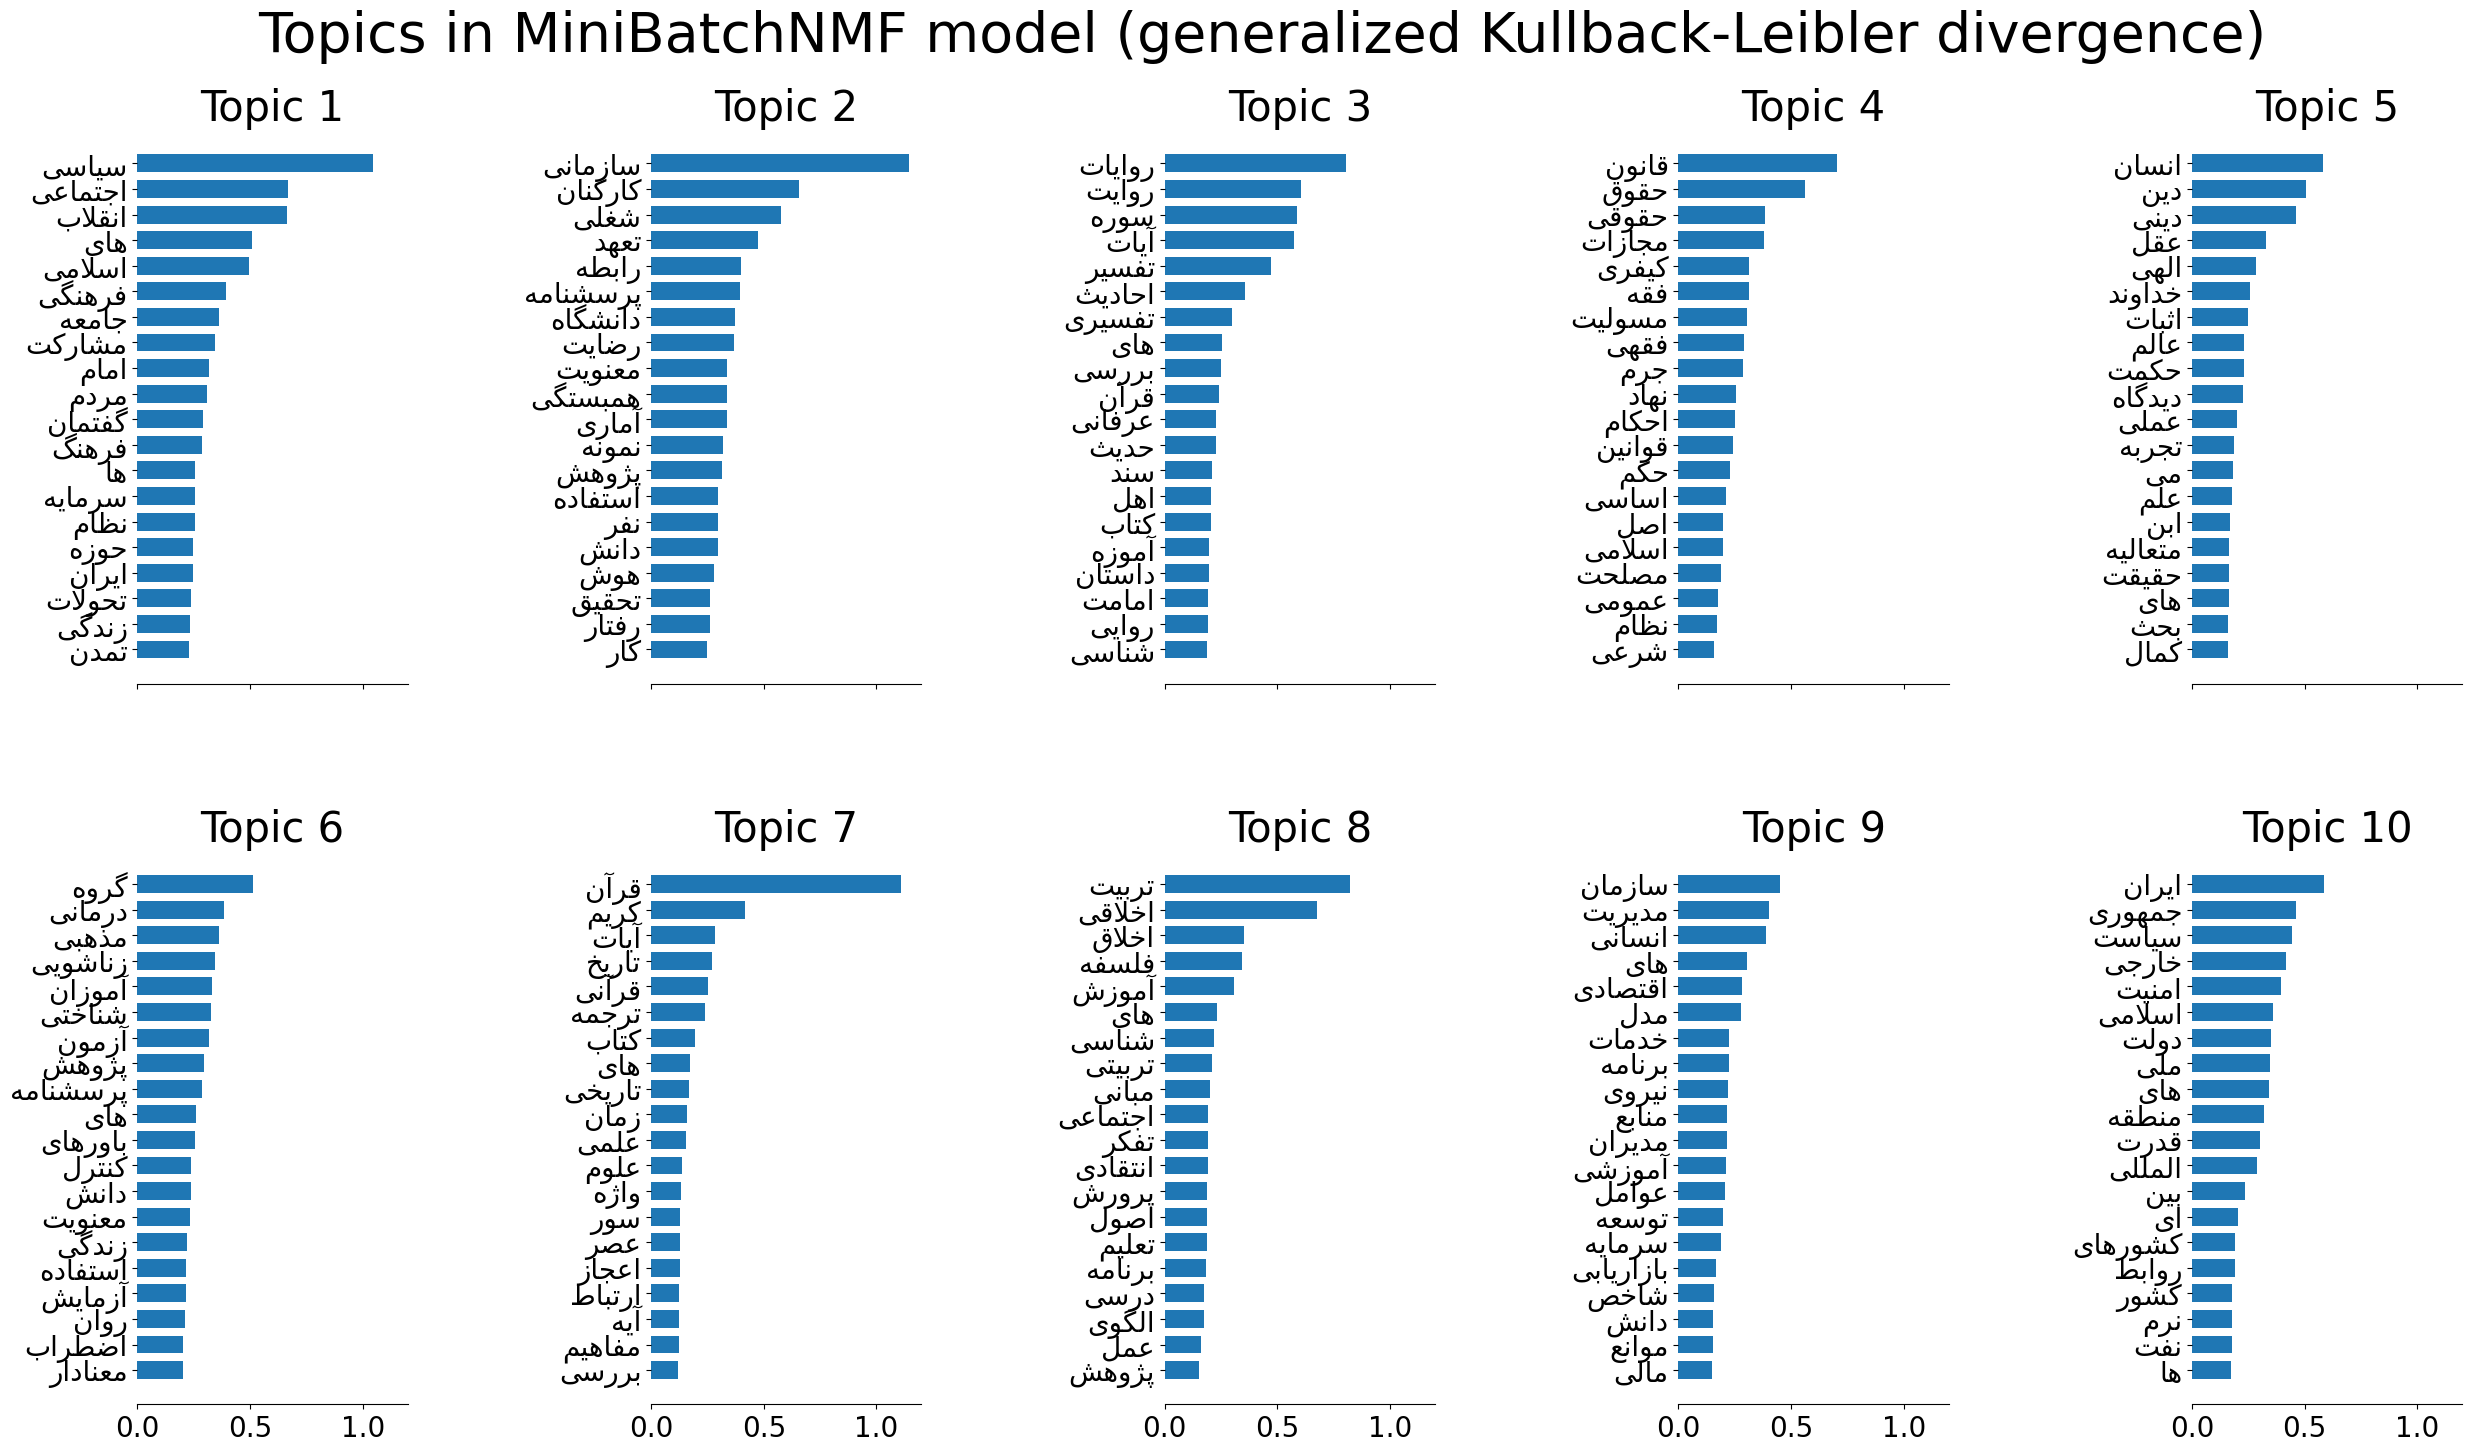



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 1.550s.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


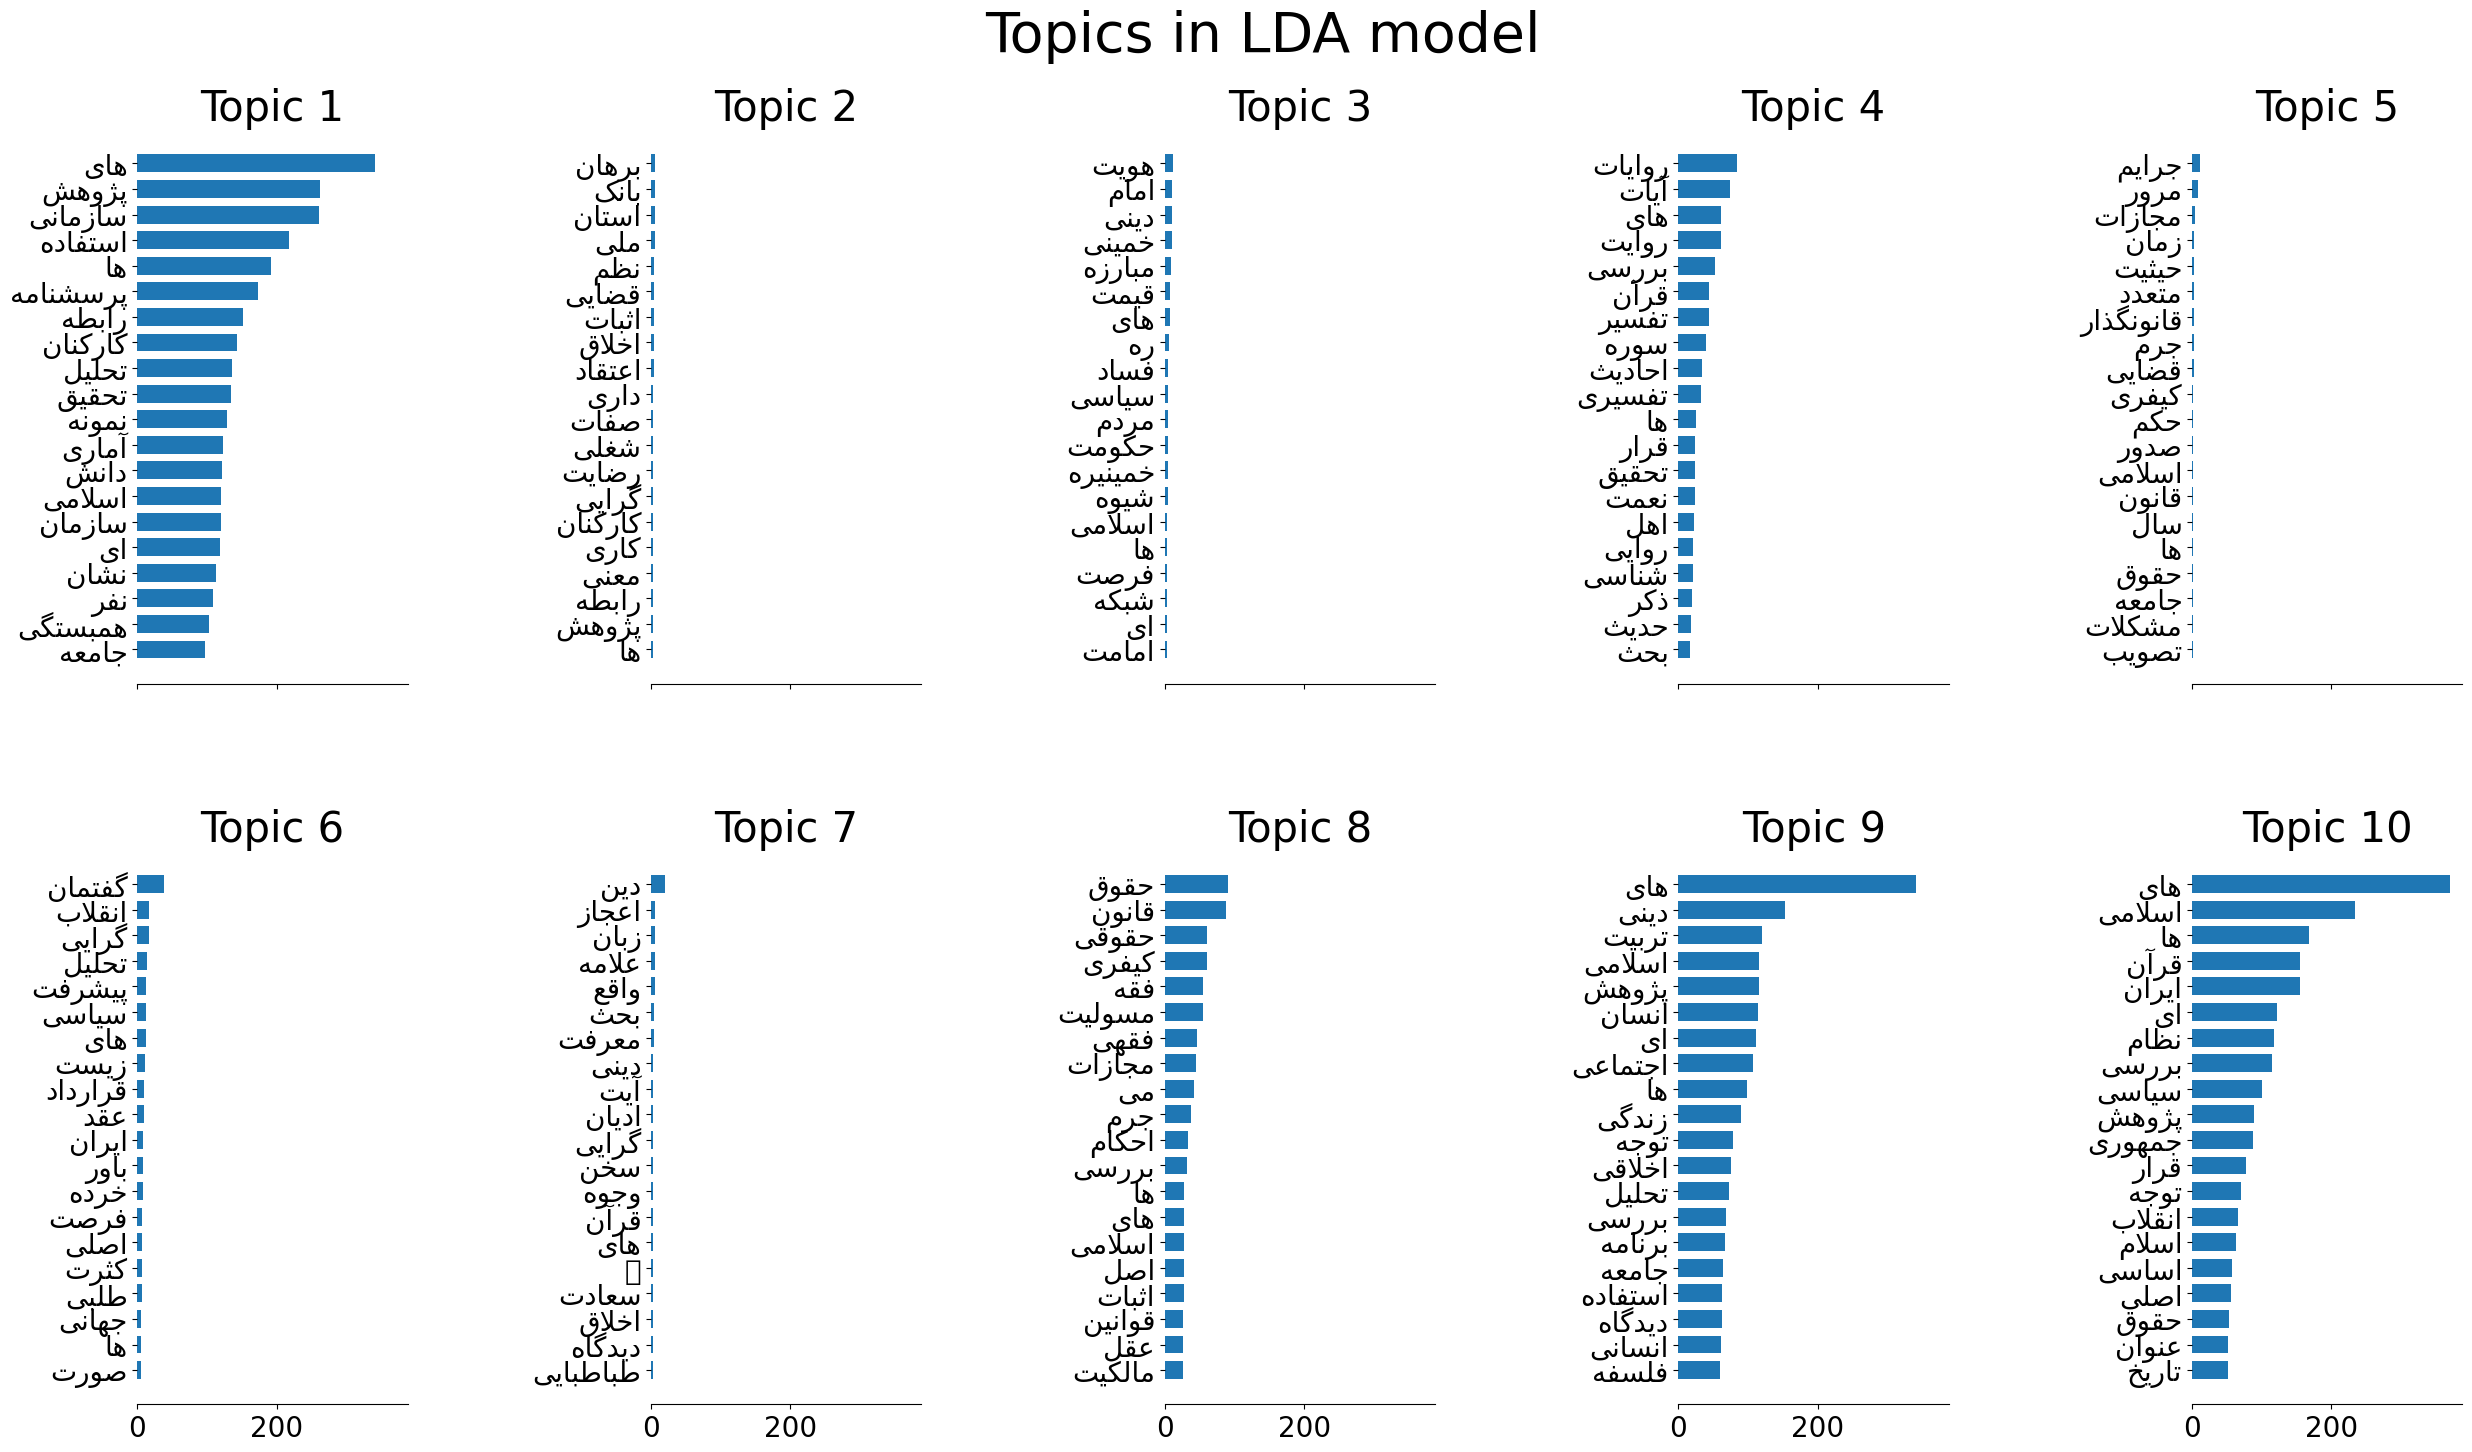

In [ ]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [_(feature_names[i]) for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
# data, _ = fetch_20newsgroups(
#     shuffle=True,
#     random_state=1,
#     remove=("headers", "footers", "quotes"),
#     return_X_y=True,
# )

# n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"



data_samples = uwl
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

Text(0.5, 1.0, 'سلام')

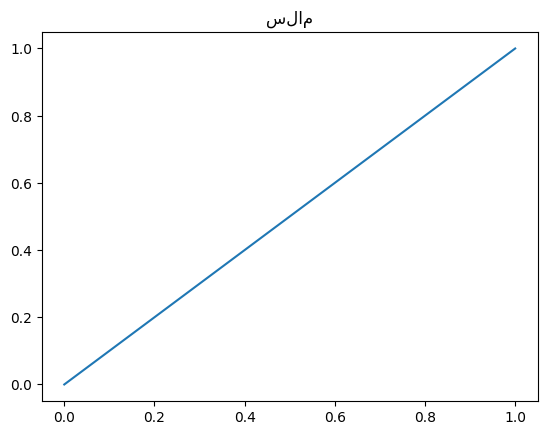

In [ ]:
plt.plot([0,1],[0,1])
plt.title('سلام')

# some good links

https://www.kaggle.com/code/halflingwizard/persian-text-augmentation
https://www.kaggle.com/code/soheiltehranipour/huggingface-nlp-in-a-nutshell
https://www.kaggle.com/code/m3hrdadfi/taaghche-sentiment-analysis
https://www.kaggle.com/code/mostafaoc2/persian-language-model

# transformer

In [ ]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer
model_size="small"
model_name = f"persiannlp/mt5-{model_size}-parsinlu-snli-entailment"
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)


In [ ]:
l = tokenizer.get_vocab()

In [ ]:
l2 = {i:j for j,i in l.items()}

In [ ]:
k = 'خوشحال'
l3 = tokenizer(k)['input_ids']
l3

[16928, 23453, 1]

In [ ]:
for i in l3:
    print(l2[i])

▁خوش
حال
</s>


In [ ]:
b = ''
for i in l3:
    b = b + l2[i]

In [ ]:
b

'▁سلامتی</s>'

In [ ]:
l = list(model.named_parameters())

In [ ]:
ss = l[0][1].detach().numpy()

In [ ]:
ss[66532]

In [ ]:
ss[168310], ss[66532]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or array
A ,B = ss[168310], ss[66532]

cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)


Cosine Similarity: 0.13628982


In [ ]:
for i in model.named_parameters():
    print(i)

In [ ]:
dir(model)

# New

In [ ]:
data.columns

Index(['id', 'body', 'keywords', 'cleaned_comment', 'word_count',
       'character_count', 'stpowords_punc_cleaned', 'midspace', 'midspace2'],
      dtype='object')

In [ ]:
body1 = data.cleaned_comment.values
body2 = data.stpowords_punc_cleaned.values
body3 = data.midspace.values
body4 = data.midspace2.values

keys = data.keywords.values

In [ ]:
import re
re.findall('st', 'string, string', flags=0)

['st', 'st']

In [ ]:
for i1,i2,i3,i4,j in zip(body1,body2,body3,body4,keys):
    print('##################################################################')
    # p = Counter(i.split(' '))
    for j2 in j.split(','):
        # print(f'Yes {j2}' if j2 in i else 'None')
        print(j2,'for clean',len(re.findall(j2, i1, flags=0)),'stup punc',len(re.findall(j2, i2, flags=0)),'hazm mid',len(re.findall(j2, i3, flags=0)),'my mid',len(re.findall(j2, i4, flags=0)))

        # try:
            # print(j2,p[j2])
            # if p[j2]==0:
                # print(f'Yes {j2}' if j2 in i else 'None')
        # except:pass


##################################################################
فقه الحدیث for clean 7 stup punc 7 hazm mid 7 my mid 7
معانی الاخبار for clean 1 stup punc 1 hazm mid 1 my mid 1
روش فقه الحدیثی for clean 1 stup punc 0 hazm mid 0 my mid 0
چینش هندسی روایات for clean 2 stup punc 2 hazm mid 2 my mid 2
شیخ صدوق for clean 7 stup punc 7 hazm mid 7 my mid 7
مبانی فقه الحدیثی for clean 1 stup punc 1 hazm mid 1 my mid 1
##################################################################
سید محمد خاتمی for clean 1 stup punc 1 hazm mid 1 my mid 1
آدریان لفت ویچ for clean 1 stup punc 1 hazm mid 1 my mid 1
پیتر ایوانز for clean 1 stup punc 1 hazm mid 1 my mid 1
دولت توسعه گرا for clean 1 stup punc 1 hazm mid 1 my mid 1
محمود احمدینژاد for clean 0 stup punc 0 hazm mid 0 my mid 1
##################################################################
جایگاه آرائ تفسیری for clean 0 stup punc 0 hazm mid 0 my mid 0
محمد یزدی for clean 3 stup punc 3 hazm mid 3 my mid 3
ترجمه قرآن for clean 4 stup punc 4 hazm

In [ ]:
i8.columns

Index(['20 words', '-1', 'keywords'], dtype='object')

In [ ]:
body1 = i8['20 words'].values
body2 = i8['-1'].values
# body3 = data.midspace.values
# body4 = data.midspace2.values

keys = i8.keywords.values

In [ ]:
i8

,20 words,-1,keywords
0,",صدوق,شیخ صدوق,شیخ,فقه,چینش,حیطه,روایات,ره,بیا...","مطلب توجه ذیل,مشخصات همزمان مطلب توجه ذیل بحث...","فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,"شتم,توسعهای,نهم دهم,مبانی فکری,نهم,هفتم,توسعه ...","شکلات کاهش,مشکلات کاهش رفع,مشکلات کاهش رفع موا...","سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,"دی,تفسیری,محمد,قرآن,تدبر,قرآن کریم,کریم,نوشتار...","یت,مشکلات کاهش رفع موانع توجه,مشروط,مشکلات کاه...","جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن"
3,"ال,دین,پیامبر,اسلام,جدال,عالیه,موعظه,احسن,اهان...","توجه,مشکلات کاهش رفع موانع توجه نکات,مشکلات کا...","محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,"عقاید,آزادی,تفسیر دین,میپذیرد,اندیشههای سیاسی,...","کمیت,مشروطه,مشکلات کاهش رفع موانع توجه نکات,مش...","آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
445,"میته امداد,امداد,رضایت شغلی,شغلی,رضایت شغلی تع...","تماعی متحول,قرار حقوق خانواده مسیر تحولات اجتم...","شیراز,ارزیابی عملکرد,کارکنان,عملکرد شغل,تعهد س..."
446,"میمات,شورای,بشر,شورا,حقوق,ضمانت اجرای,تسیس شور...","ی,مشروعیت مصادیق,مشروعیت نظام,مشرکان,مشغول,مشغ...","کمیسیون حقوقبشر,حقوقبشر ایران,بررسی دورهای جها..."
447,"واعد تفسیری,العرفان,فاضل مقداد,فاضل,مقداد,گرفت...","ش,مشهود,مشهور,مشورت,مشکل,مشکل اساسی,مشکلات,مشک...","استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری"
448,"ندگی کاری,کمیته امداد امام خمینی ره استان,امدا...","ساس کار قرار سازمانها پیوسته عملکرد,مسولیت مدن...","مدل GSTARS ۲ ٫ ۱ ,نوع دوستی,رفتار شهروندی سازم..."


In [ ]:
import re
re.findall('st', 'string, string', flags=0)

['st', 'st']

In [ ]:
len(re.findall(j2, i2, flags=0))

0

In [ ]:
j2

'کیفیت زندگی کاری'

In [ ]:
j2.split()

['کیفیت', 'زندگی', 'کاری']

In [ ]:
j2 in i2

False

In [ ]:
# body1[0]

In [ ]:
for i1,i2,j in zip(body1,body2,keys):
    print('##################################################################')
    # p = Counter(i.split(' '))
    for j2 in j.split(','):
        # print(f'Yes {j2}' if j2 in i else 'None')
        print(j2,'min20',len(re.findall(j2, i1, flags=0)),'all',len(re.findall(j2, i2, flags=0)))

        # try:
            # print(j2,p[j2])
            # if p[j2]==0:
                # print(f'Yes {j2}' if j2 in i else 'None')
        # except:pass


##################################################################
فقه الحدیث min20 0 all 0
معانی الاخبار min20 0 all 0
روش فقه الحدیثی min20 0 all 0
چینش هندسی روایات min20 0 all 0
شیخ صدوق min20 1 all 0
مبانی فقه الحدیثی min20 0 all 0
##################################################################
سید محمد خاتمی min20 0 all 0
آدریان لفت ویچ min20 0 all 0
پیتر ایوانز min20 0 all 0
دولت توسعه گرا min20 0 all 0
محمود احمدینژاد min20 0 all 0
##################################################################
جایگاه آرائ تفسیری min20 0 all 0
محمد یزدی min20 0 all 0
ترجمه قرآن min20 0 all 0
##################################################################
محدودیت بازدارنده min20 0 all 0
آزادی بیان min20 0 all 0
بدعت min20 0 all 0
دین min20 1 all 107
ارتداد min20 1 all 0
کتب ضلال min20 0 all 0
اهانت مقدسات min20 0 all 0
قانون مدنی min20 0 all 0
##################################################################
آزادی min20 1 all 5
محمد تقی مصباح یزدی min20 0 all 0
مرتضی مطهری min20 1 all 

In [ ]:
pip install perke

  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


In [62]:
!python -m perke download

Downloading...
From: https://drive.google.com/uc?id=1Q3JK4NVUC2t5QT63aDiVrCRBV225E_B3
To: /usr/local/lib/python3.10/dist-packages/perke/resources/pos_tagger.model
100% 19.2M/19.2M [00:00<00:00, 139MB/s] 


In [ ]:
data['original'][0]

'این نوشتار بر آن است تا با بررسی فقه الحدیثی کتاب معانی الاخبار، اثر شیخ صدوق (ره) به روش و مبانی ایشان دست یابد. در پژوهش به عمل آمده، با کنکاش در روایات، نتیجه ذیل، حاصل گردید که شیخ صدوق (ره) چه در حیطه مبانی و چه در حیطه روش، با دو سبک بیانی و تبیینی به بیان مطالب فقه الحدیثی خویش پرداخته است. مواقعی که صدوق (ره) مبانی و روش های فقه الحدیثی خویش را با نقل روایت بیان نموده و آن را بدون هیچ توضیح و اضافاتی مسکوت می گذارد، حکایت از مبانی یا روش بیانی ایشان دارد و در پاره ای مواقع که بیانات و اضافات خویش را به دنبال روایت قید می نماید مبانی یا روش تبیینی وی در نظر گرفته شده است. از جمله مبانی فقه الحدیثی شیخ صدوق، اعتقاد به عصمت و علم انبیاء و ائمه اطهار (علیهم السلام)، تقدم نص بر عقل با حفظ جایگاه عقل در پذیرش یا رد روایات، اعتقاد به لزوم تقیه می باشد. تشکیل خانواده حدیثی و چینش هندسی روایات، تفسیر روایات با قرآن و روایات نیز به عنوان نمونه از موارد روش های فقه الحدیثی ایشان است. نویسنده با ذکر شواهدی در این راستا، مؤیداتی بر نتایج علمی خویش ارائه نموده است. از مهمترین نتایچ این پژوه

In [63]:
from perke.unsupervised.graph_based import TextRank

# 1. Create a TextRank extractor.
extractor = TextRank()

# 2. Load the text.
extractor.load_text(input=data['body'][0])

# 3. Build the graph representation of the text and weight the
#    words. Keyphrase candidates are composed of the 33 percent
#    highest weighted words.
extractor.weight_candidates(top_t_percent=0.33)

# 4. Get the 10 highest weighted candidates as keyphrases.
keyphrases = extractor.get_n_best(n=10)

In [ ]:
keyphrases

[('مبانی فقه الحدیثی شیخ', 0.10136455330910128),
 ('روش فقه الحدیثی', 0.07119477401093278),
 ('هندسی روایات', 0.05368577668254971),
 ('مبانی شیخ', 0.05362702297966188),
 ('روش شیخ', 0.05284164176755067),
 ('فقه الحدیثی', 0.0477385403294394),
 ('روایات', 0.04040495814956815),
 ('شیخ', 0.02938540808605728),
 ('مبانی', 0.024239684893604604),
 ('مهمترین نتایچ', 0.024171394289984625)]

In [ ]:
data['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

# 6th august report text rank

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install perke

In [65]:
from perke.unsupervised.graph_based import TextRank

# 1. Create a TextRank extractor.
extractor = TextRank()

# 2. Load the text.
extractor.load_text(input=data['body'][0])

# 3. Build the graph representation of the text and weight the
#    words. Keyphrase candidates are composed of the 33 percent
#    highest weighted words.
extractor.weight_candidates(top_t_percent=0.33)

# 4. Get the 10 highest weighted candidates as keyphrases.
keyphrases = extractor.get_n_best(n=10)
keyphrases

[('مبانی فقه الحدیثی شیخ', 0.10136455330910128),
 ('روش فقه الحدیثی', 0.07119477401093278),
 ('هندسی روایات', 0.05368577668254971),
 ('مبانی شیخ', 0.05362702297966188),
 ('روش شیخ', 0.05284164176755067),
 ('فقه الحدیثی', 0.0477385403294394),
 ('روایات', 0.04040495814956815),
 ('شیخ', 0.02938540808605728),
 ('مبانی', 0.024239684893604604),
 ('مهمترین نتایچ', 0.024171394289984625)]

In [83]:
p = ''
for k1 in keyphrases:
    p = p + "," + k1[0]
p = p[1:]
p

'مبانی فقه الحدیثی شیخ,روش فقه الحدیثی,هندسی روایات,مبانی شیخ,روش شیخ,فقه الحدیثی,روایات,شیخ,مبانی,مهمترین نتایچ'

In [84]:
def keywordss(x):
    extractor = TextRank()
    extractor.load_text(input=x)
    extractor.weight_candidates(top_t_percent=0.33)
    keyphrases = extractor.get_n_best(n=10)
    p = ''
    for k1 in keyphrases:
        p = p + "," + k1[0]
    p = p[1:]
    return p

In [86]:
data['textrank'] = data['cleaned_comment'].apply(keywordss)
data['textrank']

0      مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,رو...
1      سیاست خارجی توسعه سیاسی,رویکرد توسعه‌ای دولت‌ه...
2      ترجمه قرآن کریم محمد یزدی بیان,ترجمه قرآن محمد...
3      آزادی بیان و,و بیان آزادی,و امه علیهم السلام,آ...
4      اصل آزادی بیان موضع,توحید مجال بیان عقاید,نوع ...
                             ...                        
445    رضایت شغلی کارکنان کمیته امداد شهرستان شیراز,ع...
446    شورای حقوق بشر دارای تفاوت‌های,تصمیمات شورای ح...
447    تفسیر آیات,تفسیرهای فقهی,قواعد تفسیر,تفسیری مف...
448    رفتار شهروندی سازمانی شامل نوع‌دوستی جوانمردی,...
449    بین مولفه‌های متغیر کیفیت زندگی کاری مولفه‌های...
Name: textrank, Length: 450, dtype: object

In [89]:
data['textrank'][0]

'مبانی فقه الحدیثی شیخ صدوق,روایات نتیجه ذیل,روش فقه الحدیثی,مبانی شیخ صدوق,روش شیخ صدوق,هندسی روایات,اطهار علیهم السلام تقدم,روایت,فقه الحدیثی,شیخ صدوق'

In [120]:
data.to_csv('/content/drive/MyDrive/Roshan Project/singlerank.csv')

In [132]:
llm = 0
nk = 0
for i,j in zip(data['textrank'],data['keywords']):
    k = len(j.split(','))
    k2 = len(i.split(','))
    llm2 = 0
    llk2 = 0
    for j1 in j.split(','):
        if j1 in i:
            llm2 += 1
    for i1 in i.split(','):
        if i1 in j:
            llk2 += 1
    llk2 = llk2 / k2
    llm2 = llm2 / k
    llm += llm2
    llk += llk2
llk / data.shape[0],llm / data.shape[0]

(0.3144038800705438, 0.32867691567691576)

# ?

In [ ]:
from pathlib import Path

from perke.unsupervised.graph_based import SingleRank

# Define the set of valid part of speech tags to occur in the model.
valid_pos_tags = {'NOUN', 'ADJ'}

# 1. Create a SingleRank extractor.
extractor = SingleRank(valid_pos_tags=valid_pos_tags)

# 2. Load the text.
# input_filepath = Path(__file__).parent.parent.parent / 'input.txt'
extractor.load_text(input=data['body'][0], word_normalization_method=None)

# 3. Select the longest sequences of nouns and adjectives as
#    candidates.
extractor.select_candidates()

# 4. Weight the candidates using the sum of their words weights that
#    are computed using random walk. In the graph, nodes are certain
#    parts of speech (nouns and adjectives) that are connected if
#    they co-occur in a window of 10 words.
extractor.weight_candidates(window=10)

# 5. Get the 10 highest weighted candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

for i, (weight, keyphrase) in enumerate(keyphrases):
    print(f'{i+1}.\t{keyphrase}, \t{weight}')
# keyphrases

In [117]:
def single(x):
    extractor = SingleRank(valid_pos_tags=valid_pos_tags)
    extractor.load_text(input=x, word_normalization_method=None)
    extractor.select_candidates()
    extractor.weight_candidates(window=10)
    keyphrases = extractor.get_n_best(n=10)
    p = ''
    for k1 in keyphrases:
        p = p + "," + k1[0]
    p = p[1:]
    return p

In [118]:
data['single'] = data['cleaned_comment'].apply(single)
data['single']

0      جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...
1      مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...
2      ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...
3      بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...
4      نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...
                             ...                        
445    عملکرد شغلی کارکنان کمیته امداد امام خمینیره ش...
446    تصمیمات شورای حقوق بشر,نهاد تازه تسیس شورای حق...
447    حال حاضر اثر ارزشمند فاضل مقداد کنز العرفان فی...
448    تحقیق کارکنان اداره کل کمیته امداد امام خمینی ...
449    بین ابعاد کیفیت زندگی کاری مقدار متغیر توسعه ق...
Name: single, Length: 450, dtype: object

In [119]:
data['single']

0      جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد,بررسی ف...
1      مبانی فکری دولت عدالت محور موجب اتخاذ رویکرد م...
2      ترجمه قرآن کریم محمد یزدی بیان موارد اختلاف,عن...
3      بیان آزادی قلم,آزادی بیان,پیامبر امه معصوم وخد...
4      نشیب‌های متعدد ساختار سیاسی جدیدی,تثیر نوع تفس...
                             ...                        
445    عملکرد شغلی کارکنان کمیته امداد امام خمینیره ش...
446    تصمیمات شورای حقوق بشر,نهاد تازه تسیس شورای حق...
447    حال حاضر اثر ارزشمند فاضل مقداد کنز العرفان فی...
448    تحقیق کارکنان اداره کل کمیته امداد امام خمینی ...
449    بین ابعاد کیفیت زندگی کاری مقدار متغیر توسعه ق...
Name: single, Length: 450, dtype: object

In [145]:
for i,j in zip(data['single'],data['keywords']):
    print(i.split(','))
    print(j.split(','))
    break

['جمله مبانی فقه الحدیثی شیخ صدوق اعتقاد', 'بررسی فقه الحدیثی کتاب معانی الاخبار اثر شیخ صدوق ره', 'مطابقت مبانی شیخ صدوق', 'روش شیخ صدوق', 'روش فقه الحدیثی', 'شیخ صدوق ره', 'صدوق ره مبانی', 'چینش هندسی روایات تفسیر روایات', 'سبک زیبای فقه الحدیثی', 'موارد روش\u200cهای فقه الحدیثی']
['فقه الحدیث', 'معانی الاخبار', 'روش فقه الحدیثی', 'چینش هندسی روایات', 'شیخ صدوق', 'مبانی فقه الحدیثی']


In [153]:
llm = 0
nk = 0
llk = 0

for i,j in zip(data['single'],data['keywords']):
    k = len(j.split(','))
    # k2 = len(j.split(','))
    k2 = len(i.split(','))
    llm2 = 0
    llk2 = 0
    for j1 in j.split(','):
        if j1 in i:
            print(j1, "is in i")
            llm2 += 1
    for i1 in i.split(','):
        if i1 in j:
            print(i1, "is in j")
            llk2 += 1
    # print(llk2,llm2,k,k2)

    llk2 = llk2 / k2
    llm2 = llm2 / k
    # print(llk2,llm2,k,k2)
    llm += llm2
    llk += llk2
    # break
llk / data.shape[0],llm / data.shape[0]

فقه الحدیث is in i
معانی الاخبار is in i
روش فقه الحدیثی is in i
چینش هندسی روایات is in i
شیخ صدوق is in i
مبانی فقه الحدیثی is in i
روش فقه الحدیثی is in j
آدریان لفت ویچ is in i
دولت توسعه گرا is in i
محمد یزدی is in i
ترجمه قرآن is in i
ترجمه قرآن is in j
آزادی بیان is in i
ارتداد is in i
آزادی بیان is in j
آزادی is in i
تفسیر دین is in i
اندیشه سیاسی is in i
اندیشه سیاسی is in j
تفسیر دین is in j
تفسیر اجتهادی is in i
آیت‌الله معرفت is in i
روایات تفسیری is in i
روایات تفسیری is in j
علوم تجربی is in i
پیشرفت درسی is in i
کیفیت زندگی is in i
آموزش شناختی رفتاری is in i
رضایت زناشویی is in i
آموزش شناختی رفتاری is in j
تسهیم دانش is in i
یادگیری is in i
فرهنگ یادگیری is in i
 is in i
دانشگاه آزاد اسلامی واحد مرودشت is in i
اعضای هیات علمی is in i
هوش سازمانی is in i
مدیریت دانش is in i
دانشگاه is in i
خلق دانش is in i
هیات علمی is in i
هوش سازمانی is in j
دانشگاه دولتی is in i
معیار is in i
پذیرش دانشجو is in i
انعطاف‌پذیری شناختی is in i
آموزش فلسفه is in j
تفکر انتقادی is in i
شع

(0.05209523809523813, 0.5500896264229601)

In [123]:
from perke.unsupervised.graph_based import TopicRank

# Define the set of valid part of speech tags to occur in the model.
valid_pos_tags = {'NOUN', 'ADJ'}

# 1. Create a TopicRank extractor.
extractor = TopicRank(valid_pos_tags=valid_pos_tags)

# 2. Load the text.
# input_filepath = Path(__file__).parent.parent.parent / 'input.txt'
extractor.load_text(input=data['body'][0], word_normalization_method=None)

# 3. Select the longest sequences of nouns and adjectives, that do
#    not contain punctuation marks or stopwords as candidates.
extractor.select_candidates()

# 4. Build topics by grouping candidates with HAC (average linkage,
#    jaccard distance, threshold of 1/4 of shared normalized words).
#    Weight the topics using random walk, and select the first
#    occurring candidate from each topic.
extractor.weight_candidates(
    threshold=0.74, metric='jaccard', linkage_method='average'
)

# 5. Get the 10 highest weighted candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

for i, (weight, keyphrase) in enumerate(keyphrases):
    print(f'{i + 1}.\t{keyphrase}, \t{weight}')

1.	0.0765733903533416, 	روایات
2.	0.05572242061402186, 	شیخ صدوق
3.	0.04900047612453345, 	مبانی
4.	0.031547685176012426, 	نتایج علمی
5.	0.030305082694562592, 	اعتقاد
6.	0.029895297174090875, 	عقل
7.	0.02633477465297309, 	پژوهش
8.	0.018561356059936914, 	مقام ولایت
9.	0.018378395909365148, 	پذیرش
10.	0.018260839258316897, 	ائمه اطهار


In [126]:
def topic(x):
    extractor = TopicRank(valid_pos_tags=valid_pos_tags)
    extractor.load_text(input=x, word_normalization_method=None)
    extractor.select_candidates()
    extractor.weight_candidates(
        threshold=0.74, metric='jaccard', linkage_method='average'
    )
    keyphrases = extractor.get_n_best(n=10)
    p = ''
    for k1 in keyphrases:
        p = p + "," + k1[0]
    p = p[1:]
    return p

In [127]:
data['topic'] = data['cleaned_comment'].apply(topic)
data['topic']

0      شیخ صدوق ره,مبانی,رد روایات اعتقاد,نتایج علمی,...
1      سیاست خارجی اولویت توسعه سیاسی,توسعه,نهادهای م...
2      مستلزم ترجمه,آیات قرآن ابراز,آیات قرآن کریم,تد...
3      دین,آزادی موهبتی,انسان عطا,اسلام,آزادی قلم,قال...
4      سیاسی,دین,مرتضی مطهری,نفی آزادی ری,تفسیر,متفکر...
                             ...                        
445    تعهد سازمانی,هدف بررسی رابطه رضایت شغلی,کارکنا...
446    تشکیل کمیسیون حقوق بشر,ساختار,عملکرد,کمیسیون,ح...
447    قواعد متقنی,تفسیر آیات کریمه,تفسیر شناسایی,است...
448    بررسی مجدد,پایایی,روایی,پژوهش پرسشنامه استاندا...
449    آمار توصیفی,آزمون ضریب همبستگی پیرسون,رگرسیون ...
Name: topic, Length: 450, dtype: object

In [130]:
llm = 0
llk = 0
nk = 0
kn = 0
for i,j in zip(data['topic'],data['keywords']):
    k = len(j.split(','))
    k2 = len(i.split(','))
    llm2 = 0
    llk2 = 0
    for j1 in j.split(','):
        if j1 in i:
            llm2 += 1
    for i1 in i.split(','):
        if i1 in j:
            llk2 += 1
    llk2 = llk2 / k2
    llm2 = llm2 / k
    llm += llm2
    llk += llk2
llk / data.shape[0],llm / data.shape[0]

(0.1357222222222227, 0.32443107509774183)

In [133]:
from perke.unsupervised.graph_based import PositionRank

# Define the set of valid part of speech tags to occur in the model.
valid_pos_tags = {'NOUN'}

# Define the grammar for selecting the keyphrase candidates
grammar = r"""
    NP:
        {<NOUN>}<VERB>
    NP:
        {<DET(,EZ)?|NOUN(,EZ)?|NUM(,EZ)?|ADJ(,EZ)|PRON><DET(,EZ)|NOUN(,EZ)|NUM(,EZ)|ADJ(,EZ)|PRON>*}
        <NOUN>}{<.*(,EZ)?>
"""

# 1. Create a PositionRank extractor.
extractor = PositionRank(valid_pos_tags=valid_pos_tags)

# 2. Load the text.
# input_filepath = Path(__file__).parent.parent.parent / 'input.txt'
extractor.load_text(
    input=data['body'][0],
    word_normalization_method=None,
    universal_pos_tags=False,
)

# 3. Select the noun phrases up to 3 words as keyphrase candidates.
extractor.select_candidates(grammar=grammar, maximum_word_number=3)

# 4. Weight the candidates using the sum of their word's weights
#    that are computed using random walk biased with the position of
#    the words in the text. In the graph, nodes are words (nouns
#    and adjectives only) that are connected if they co-occur in a
#    window of 10 words.
extractor.weight_candidates(window_size=10)

# 5. Get the 10 highest weighted candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

for i, (weight, keyphrase) in enumerate(keyphrases):
    print(f'{i+1}.\t{keyphrase}, \t{weight}')

1.	0.10385846816742673, 	الحدیثی
2.	0.10136237029415897, 	صدوق
3.	0.05750553488731, 	روش شیخ
4.	0.05346824789989601, 	نوشتار
5.	0.0527345123882844, 	روایات
6.	0.0401148391446214, 	ره
7.	0.03785798775460737, 	مبانی ایشان
8.	0.03785798775460737, 	مبانی
9.	0.03785798775460737, 	مبانی فقه
10.	0.03785798775460737, 	مطابقت مبانی


In [ ]:
def position(x):
    extractor = PositionRank(valid_pos_tags=valid_pos_tags)
    extractor.load_text(
        input=x,
        word_normalization_method=None,
        universal_pos_tags=False,
    )
    extractor.select_candidates(grammar=grammar, maximum_word_number=3)
    extractor.weight_candidates(window_size=10)
    keyphrases = extractor.get_n_best(n=10)
    p = ''
    for k1 in keyphrases:
        p = p + "," + k1[0]
    p = p[1:]
    return p

In [ ]:
data['position'] = data['cleaned_comment'].apply(position)
data['position']

In [ ]:
llm = 0
nk = 0
for i,j in zip(data['position'],data['keywords']):
    k = len(j.split(','))
    llm2 = 0
    for j1 in j.split(','):
        if j1 in i:
            llm2 += 1
    llm2 = llm2 / k
    llm += llm2
llm / data.shape[0]

In [ ]:
# compare
# body 0.7336683417085427
# clean 0.7997061703728389

In [ ]:
# singlerank 0.5500896264229601
# textrank 0.32867691567691576
# tfidf 0.172669179173

In [ ]:
data.columns

In [135]:
llm = 0
llk = 0
nk = 0
for i,j in zip(data['body'],data['keywords']):
    k = len(j.split(','))
    k2 = len(i.split(','))
    llm2 = 0
    llk2 = 0
    for j1 in j.split(','):
        if j1 in i:
            llm2 += 1
    for i1 in i.split(','):
        if i1 in j:
            llk2 += 1
    llk2 = llk2 / k2
    llm2 = llm2 / k
    llm += llm2
    llk += llk2
llk / data.shape[0],llm / data.shape[0]

(0.0, 0.7997061703728389)

In [ ]:
llm = 0
nk = 0
for i,j in zip(data['body'],data['keywords']):
    k = len(j.split(','))
    k2 = len(i.split(','))
    llm2 = 0
    llk2 = 0
    for j1 in j.split(','):
        if j1 in i:
            llm2 += 1
    for i1 in i.split(','):
        if i1 in j:
            llk2 += 1
    llk2 = llk2 / k2
    llm2 = llm2 / k
    llm += llm2
    llk += llk2
llk / data.shape[0],llm / data.shape[0]